In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

import os
import sys
import numpy as np
import pandas as pd

In [65]:
def save_fig(fig, output_filepath, dpi=72):
    output_path, filename = os.path.split(output_filepath)
        
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    
    #plt.tight_layout()
    fig.savefig(output_filepath, transparent=False, bbox_inches='tight', pad_inches=0.1, dpi=dpi)

In [8]:
RNGS = ((320,10000000), (320,10000), (10000,100000), (100000,1000000), (1000000,10000000), (320,1000000))

In [16]:
DEF_COLOR = ['#747474', '#939393', '#b3b3b3', '#d3d3d3']

COLORS = {
    'A2': ['#663398', '#ad8afe', '#c7abf9', '#dbcaff'],
    'A2Sr': ['#1e824c', '#80b684', '#a6c9a9', '#c8ddca'],
    'A2Zn': ['#23819b', '#2fa9ce', '#58bbda', '#8ad0e6'],
    '45S5': ['#ae4a00', '#c95400', '#e05e00', '#ff852f']
}

In [62]:
sample_configs_OLD = {'A2':  {'color': '#663399', 
                              'ranges': RNGS, 
                              'tomo_name': 'scan_0007', 
                              'stat_folder': 'Analysis'},
                     'A2Sr': {'color': '#1e824c', 
                              'ranges': RNGS, 
                              'tomo_name': 'scan_0005',
                              'stat_folder': 'Analysis_temp'},
                     'A2Zn': {'color': '#23819c', 
                              'ranges': RNGS, 
                              'tomo_name': 'scan_0008',
                              'stat_folder': 'Analysis_temp'},
                     '45S5': {'color': '#ae4900', 
                              'ranges': RNGS, 
                              'tomo_name': 'scan_0010', 
                              'stat_folder': 'Analysis'}}

In [106]:
sample_configs = {'A2':  {'color': '#663399', 
                              'ranges': RNGS, 
                              'tomo_name': 'scan_0007', 
                              'stat_folder': 'Analysis',
                              'filename': 'particles_stats_'},
                     'A2Sr': {'color': '#1e824c', 
                              'ranges': RNGS, 
                              'tomo_name': 'scan_0005',
                              'stat_folder': 'Analysis_temp',
                              'filename': 'particles_stats_'},
                     'A2Zn': {'color': '#23819c', 
                              'ranges': RNGS, 
                              'tomo_name': 'scan_0008',
                              'stat_folder': 'Analysis_temp',
                              'filename': 'particles_stats_'},
                     '45S5': {'color': '#ae4900', 
                              'ranges': RNGS, 
                              'tomo_name': 'scan_0010', 
                              'stat_folder': 'Analysis',
                              'filename': 'particles_stats_'}}

In [138]:
sample_configs_log = {'A2':  {'color': '#663399', 
                              'ranges': RNGS, 
                              'tomo_name': 'scan_0007', 
                              'stat_folder': 'Analysis_temp',
                              'filename': 'particles_stats_old_'},
                     'A2Sr': {'color': '#1e824c', 
                              'ranges': RNGS, 
                              'tomo_name': 'scan_0005',
                              'stat_folder': 'Analysis_temp',
                              'filename': 'particles_stats_'},
                     'A2Zn': {'color': '#23819c', 
                              'ranges': RNGS, 
                              'tomo_name': 'scan_0008',
                              'stat_folder': 'Analysis_temp',
                              'filename': 'particles_stats_'},
                     '45S5': {'color': '#ae4900', 
                              'ranges': RNGS, 
                              'tomo_name': 'scan_0010', 
                              'stat_folder': 'Analysis_temp',
                              'filename': 'particles_stats_watershed_'}}

In [23]:
def number(val):
    if val < 1000:
        return '%d' % val
        
    sv = str(val)
    return '$\mathregular{10^{%d}}$' % (len(sv)-2) if val % 10 == 0 else '%0.0e' % val

In [131]:
def create_pie_chart(input_dir, output_dir, sample_config, sample_name, rngs, stat_folder='Analysis_temp', title=None,
                     unit_scale=3.7**3, lang='en', measure_type='vol',
                     zebra_color=(False,3), legend_fontsize=50, chart_fontsize=60, dpi=72):
    print sample_name
    
    stats_filename = sample_config['filename']
    
    df_scan = pd.DataFrame.from_csv(os.path.join(input_dir, 
                                                 sample_config['tomo_name'], 
                                                 stat_folder, 
                                                 stats_filename + '{}.csv').format(sample_config['tomo_name']))
    df = df_scan['area'] * unit_scale
    
    print 'Max: {}, Min: {}'.format(df.max(), df.min())
    
    data_ranges = []
    for rng in rngs:
        rng_min, rng_max = rng[0], rng[1]
        data_rng = df[(df > rng_min) & (df < rng_max)]
        data_ranges.append(data_rng)
    
    num_elem = [len(p) for p in data_ranges]
    se = sum(num_elem)

    proc_particles = [n/float(se) * 100.0 for n in num_elem]
    
    for size, rng in zip(num_elem, rngs):
        print '{}-{}: {}'.format(rng[0], rng[1], size)
                      
    def get_title(v1, v2, lang, measure_type):
        if measure_type == 'vol':
            measure_quantity = 'm^3' if lang == 'en' else u'м^3'
        else:
            measure_quantity = 'm' if lang == 'en' else u'м'
        
        ftm = '%s $\minus$ %s $\mathregular{\mu %s}$' if lang == 'en' else u'%s $\minus$ %s $\mathregular{мк%s}$'
        return ftm % (number(v1), number(v2), measure_quantity)
                      
    titles = [get_title(minv, maxv, lang, measure_type) for minv,maxv in rngs]
    
    colors = COLORS.get(sample_name, DEF_COLOR)
        
    textprops={'fontsize': chart_fontsize, 'weight': 'normal', 'family': 'sans-serif'}
    pie_width = 0.5
    fig, ax = plt.subplots(figsize=(33,15))
    ax.axis('equal')
    patches, texts, autotexts = ax.pie(proc_particles, \
                                       textprops=textprops, \
                                       colors=colors, \
                                       autopct='%1.1f%%', \
                                       radius=1, \
                                       pctdistance=1-pie_width/2)
    
    if (zebra_color is not None) and (zebra_color[0]):
        for tt in autotexts[:zebra_color[1]]:
            tt.set_color('white')
    
    plt.setp(patches, \
             width=pie_width, \
             edgecolor='white')

    plt.legend(patches, titles, loc=(0.383,-0.35), fontsize=legend_fontsize)
    
    _d, _offset, _di = [1,-1], [0.45, 0.45], 0
    
    for t, p in zip(autotexts, proc_particles):
        if p < 2.0:
            pos = list(t.get_position())
            pos[0] = pos[0] + _d[_di] * _offset[_di]

            t.set_position(pos)
            _di += 1

    out_figpath = os.path.join(output_dir, sample_name, '_'.join([sample_name, title, 'pie', lang]) + '.png')
    
    plt.tight_layout()
    fig.savefig(out_figpath, transparent=False, pad_inches=0.1, bbox_inches='tight', dpi=dpi)

In [140]:
def plot_barchart(input_path, 
                  output_path, 
                  sample_config, 
                  sample_name,
                  stat_folder,
                  print_log=True,
                  plot_rects=False,
                  plot_arithm=True,
                  plot_large=True,
                  ps3=3.7**3, 
                  dpi=72):
    from matplotlib.patches import Rectangle
    from matplotlib.transforms import Bbox
    from matplotlib.ticker import MaxNLocator, LinearLocator
    
    data_frames = []
    
    def _plot_chart(df, rng, sample_config, fontsize, figsize=(15,12)):       
        fig, ax = plt.subplots(figsize=figsize)

        ax.margins(x=0.05, y=0.1)
        ax.hist(df.values, 
                bins=50, 
                color=sample_config['color'], 
                edgecolor='#000000',
                linewidth=1.5)
        
        ax.set_position(Bbox.from_bounds(0.05, 0.05, 0.95, 0.95))
        
        ax.set_xlim((rng[0], rng[1]))
        #ax.set_ylim(ymin=0)

        if print_log:
            ax.set_ylim(ymin=1)
            
        ax.tick_params(axis='x', labelsize=fontsize, colors='#000000', 
                       which='both', direction='out', length=8, width=2)
        ax.tick_params(axis='x', labelsize=fontsize, colors='#000000', 
                       which='minor', direction='out', length=8, width=2)
        
        ax.tick_params(axis='y', labelsize=fontsize, colors='#000000', 
                       which='major', direction='out', length=8, width=2)
        ax.tick_params(axis='y', labelsize=fontsize, colors='#000000', 
                       which='minor', direction='out', length=8, width=2)
        
        ax.set_xlabel(r'Size of particles, $\mathregular{\mu m^3}$', fontsize=fontsize, color='#000000')
        ax.set_ylabel('Number of particles', fontsize=fontsize, color='#000000')
        
        ax.yaxis.label.set_color('#000000')
        ax.xaxis.label.set_color('#000000')
        
        ax.xaxis.set_major_locator(MaxNLocator(prune='lower'))
        #ax.yaxis.set_major_locator(LinearLocator(numticks=6))
        
        for k in ax.spines.keys():
            ax.spines[k].set_color('#000000')
            ax.spines[k].set_linewidth(2)
        
        ax.xaxis.offsetText.set_fontsize(fontsize)
        ax.yaxis.offsetText.set_fontsize(fontsize)
        
        exp_lbl = ax.yaxis.get_offset_text()
        exp_lbl.set_y(exp_lbl.get_position()[1] + 0.05)
        
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

        return fig, ax
    
    fontsize = 50

    stats_filename = sample_config['filename']
    smpl_fmt = 'plot_{}_{}_rect.png' if plot_rects else 'plot_{}_{}.png'
    smpl_log_fmt = 'plot_{}_{}_log_rect.png' if print_log else 'plot_{}_{}_log.png'

    df_scan = pd.DataFrame.from_csv(os.path.join(input_path, 
                                                 sample_config['tomo_name'], 
                                                 stat_folder, 
                                                 stats_filename + '{}.csv').format(sample_config['tomo_name']))
    df_scan['volume(um^3)'] = df_scan['area'] * ps3

    for rng in sample_config['ranges']:
        data_frames.append(df_scan[(df_scan['volume(um^3)'] > rng[0]) & (df_scan['volume(um^3)'] < rng[1])]['volume(um^3)'])

    if plot_large:
        fig, ax = _plot_chart(data_frames[0], sample_config['ranges'][0], sample_config, fontsize, figsize=(25,12))

        if plot_rects:
            hsit_val_max = np.max(np.histogram(data_frames[0].values, bins=50)[0])
            cclrs = ['red', 'green', 'blue', 'magenta', 'yellowgreen']

            for i,(c, r) in enumerate(zip(cclrs, sample_config['ranges'][1:])):
                if i == (len(sample_config['ranges'][1:]) - 1):
                    ax.add_patch(Rectangle((r[0],0), r[1]-r[0], hsit_val_max, linewidth=1.5, edgecolor=c, facecolor='none'))
                else:
                    ax.add_patch(Rectangle((r[0],0), r[1]-r[0], hsit_val_max, linewidth=1.5, edgecolor=c, facecolor='none'))

        plt.show()
        save_fig(fig, os.path.join(output_path, sample_name, smpl_fmt.format(sample_config['ranges'][0][0], 
                                                                             sample_config['ranges'][0][1])), dpi=dpi)
    
    if print_log:
        fig, ax = _plot_chart(data_frames[0], sample_config['ranges'][0], sample_config, fontsize, figsize=(25,12))
        ax.set_yscale('symlog')
        
        plt.show()
        save_fig(fig, os.path.join(output_path, sample_name, smpl_log_fmt.format(sample_config['ranges'][0][0], 
                                                                                 sample_config['ranges'][0][1])), dpi=dpi)
    
    if plot_arithm:
        for df, rng in zip(data_frames[1:], sample_config['ranges'][1:]):
            fig, ax = _plot_chart(df, rng, sample_config, fontsize)
            save_fig(fig, os.path.join(output_path, sample_name, smpl_fmt.format(rng[0], rng[1])), dpi=dpi)
            plt.show()

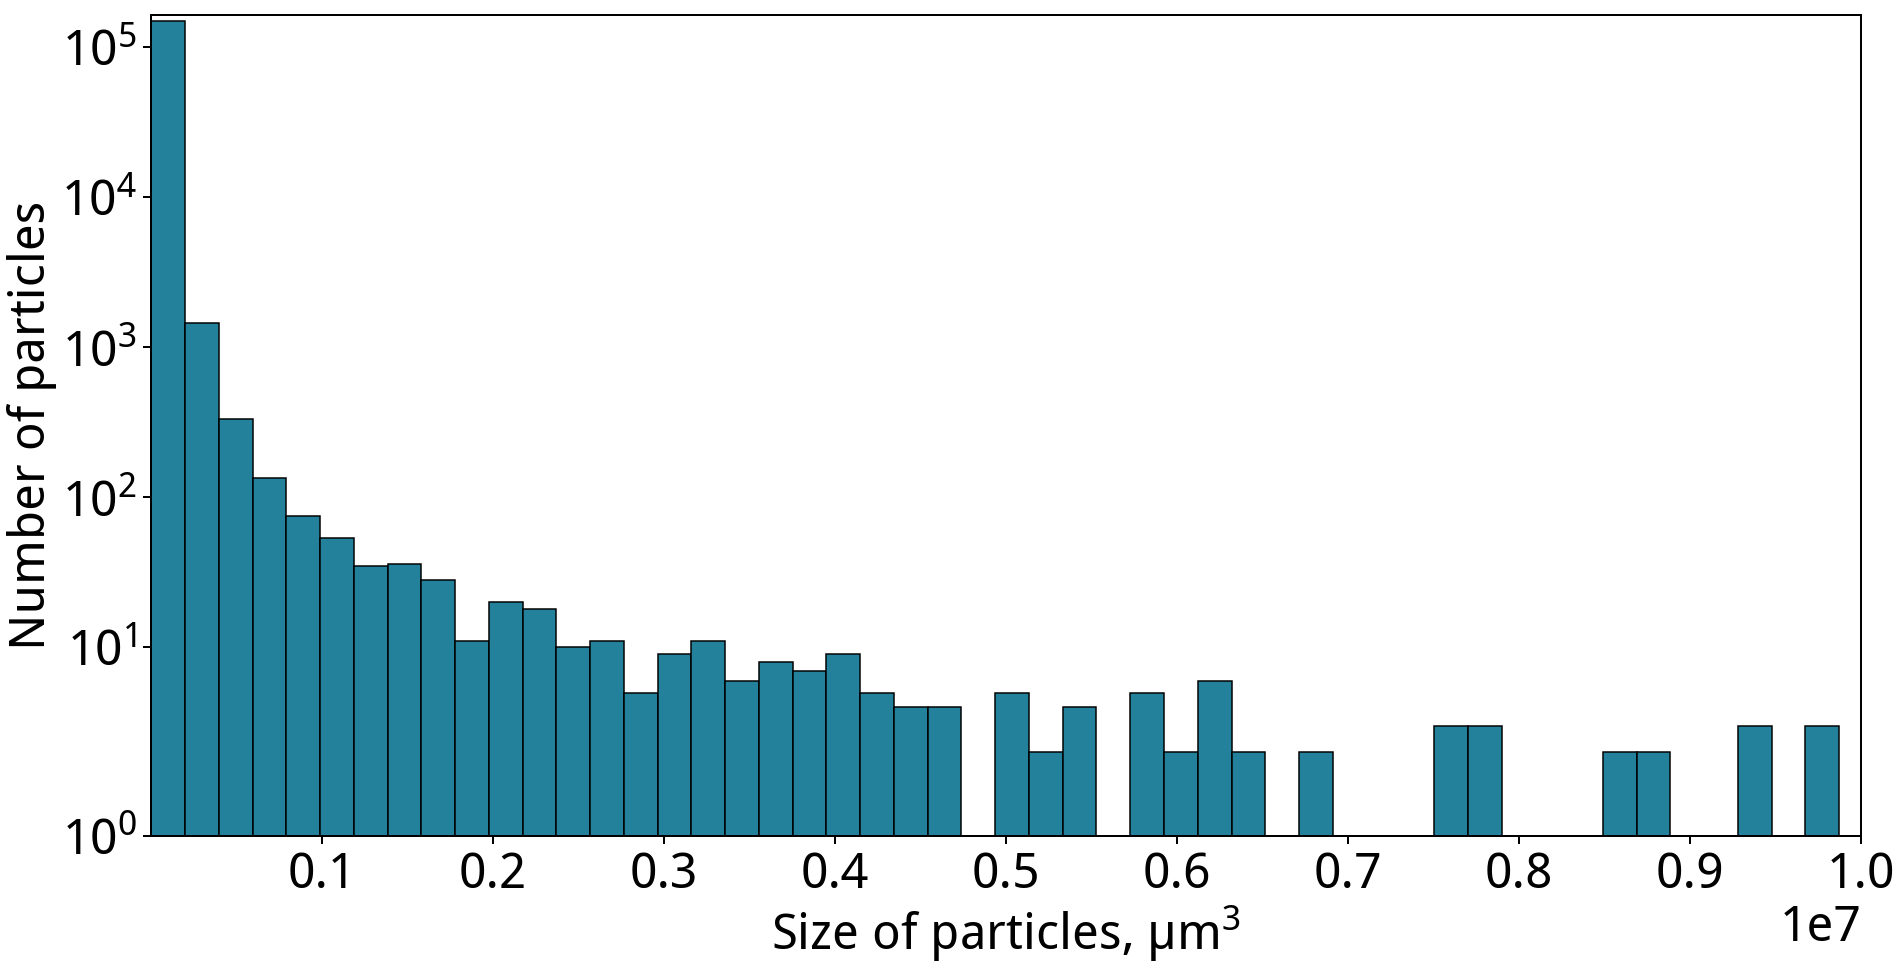

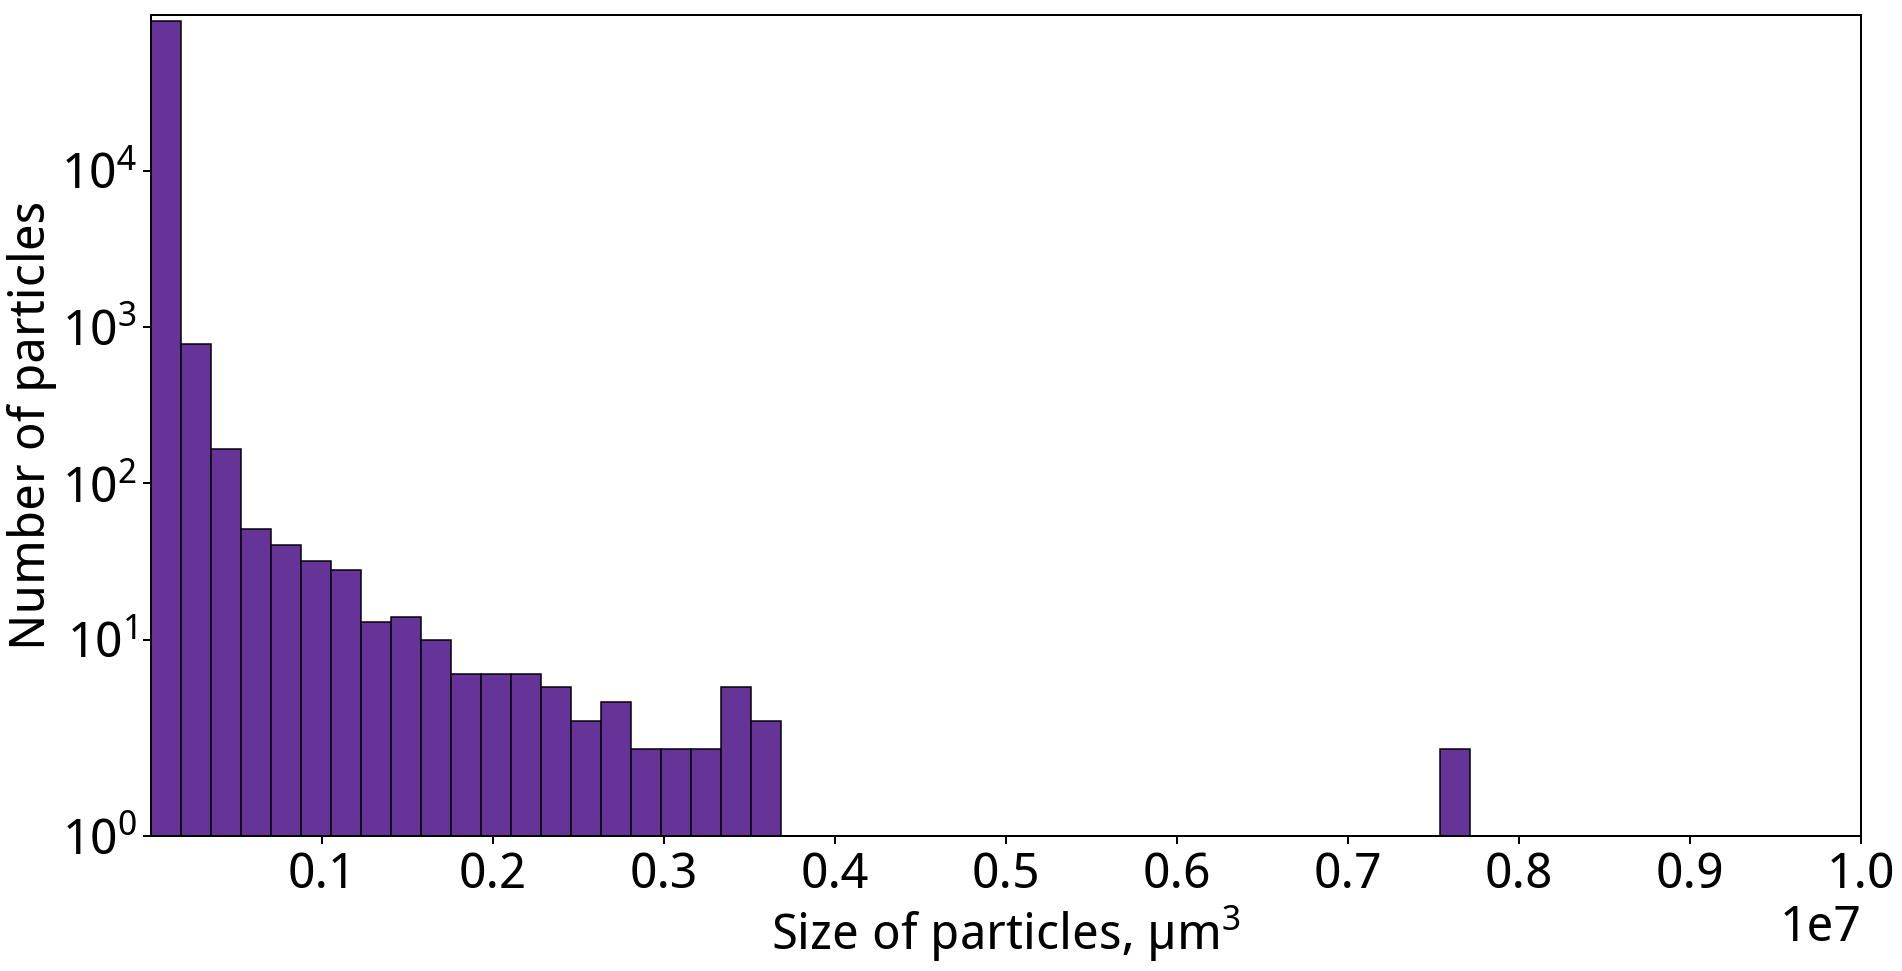

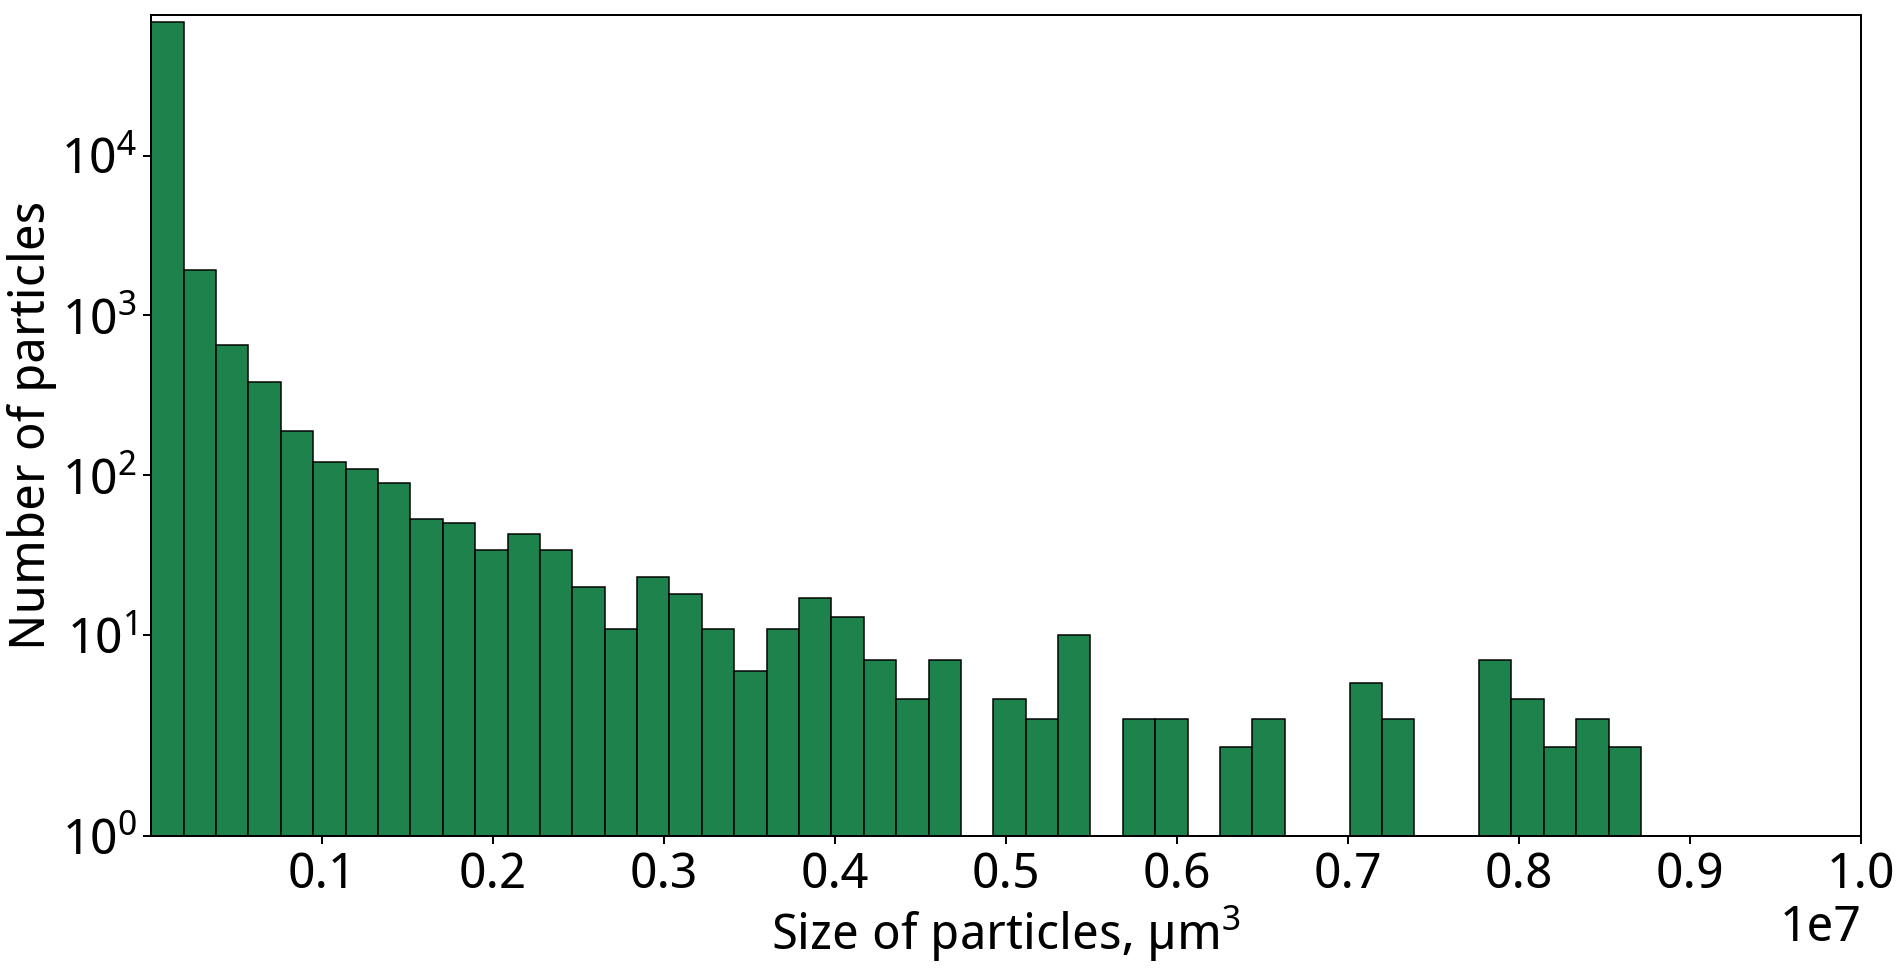

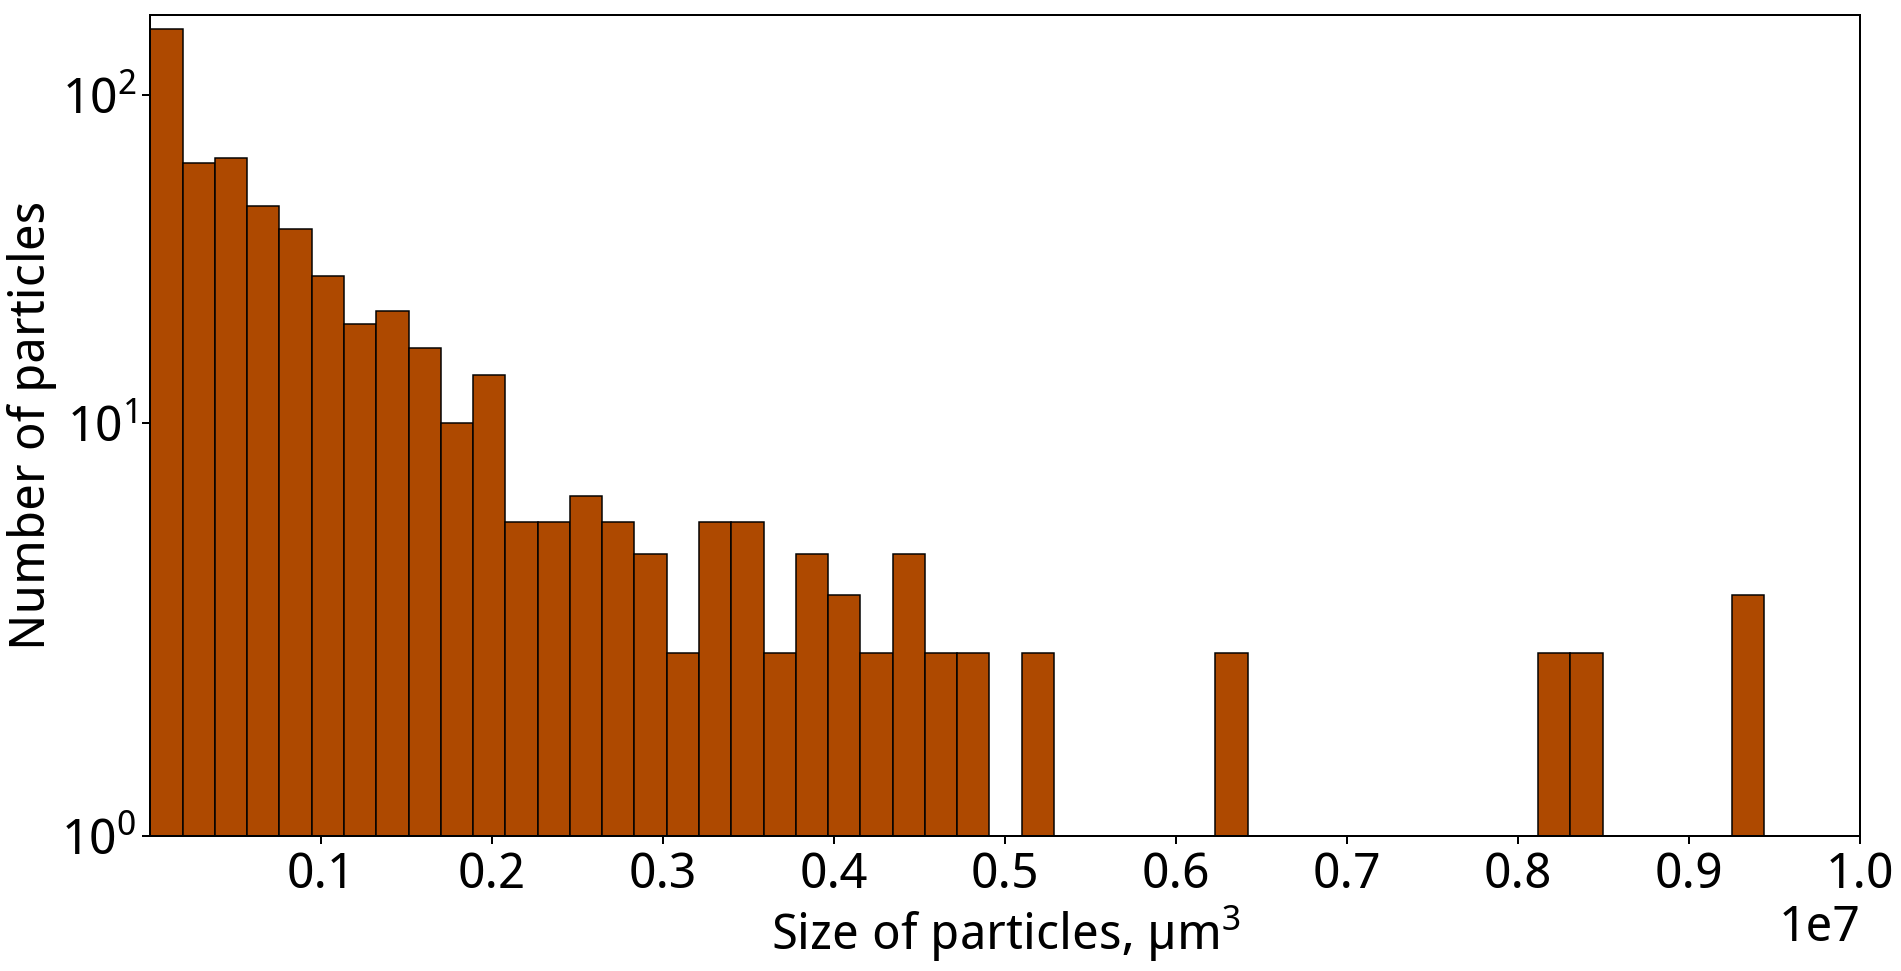

In [141]:
for sn, conf in sample_configs_log.iteritems():
    plot_barchart('./data/bioglass_raw_data/', 
                  './data/bioglass_results', 
                  conf,
                  sn,
                  stat_folder=conf['stat_folder'],
                  ps3=3.7**3,
                  print_log=True,
                  plot_arithm=False,
                  plot_large=False)

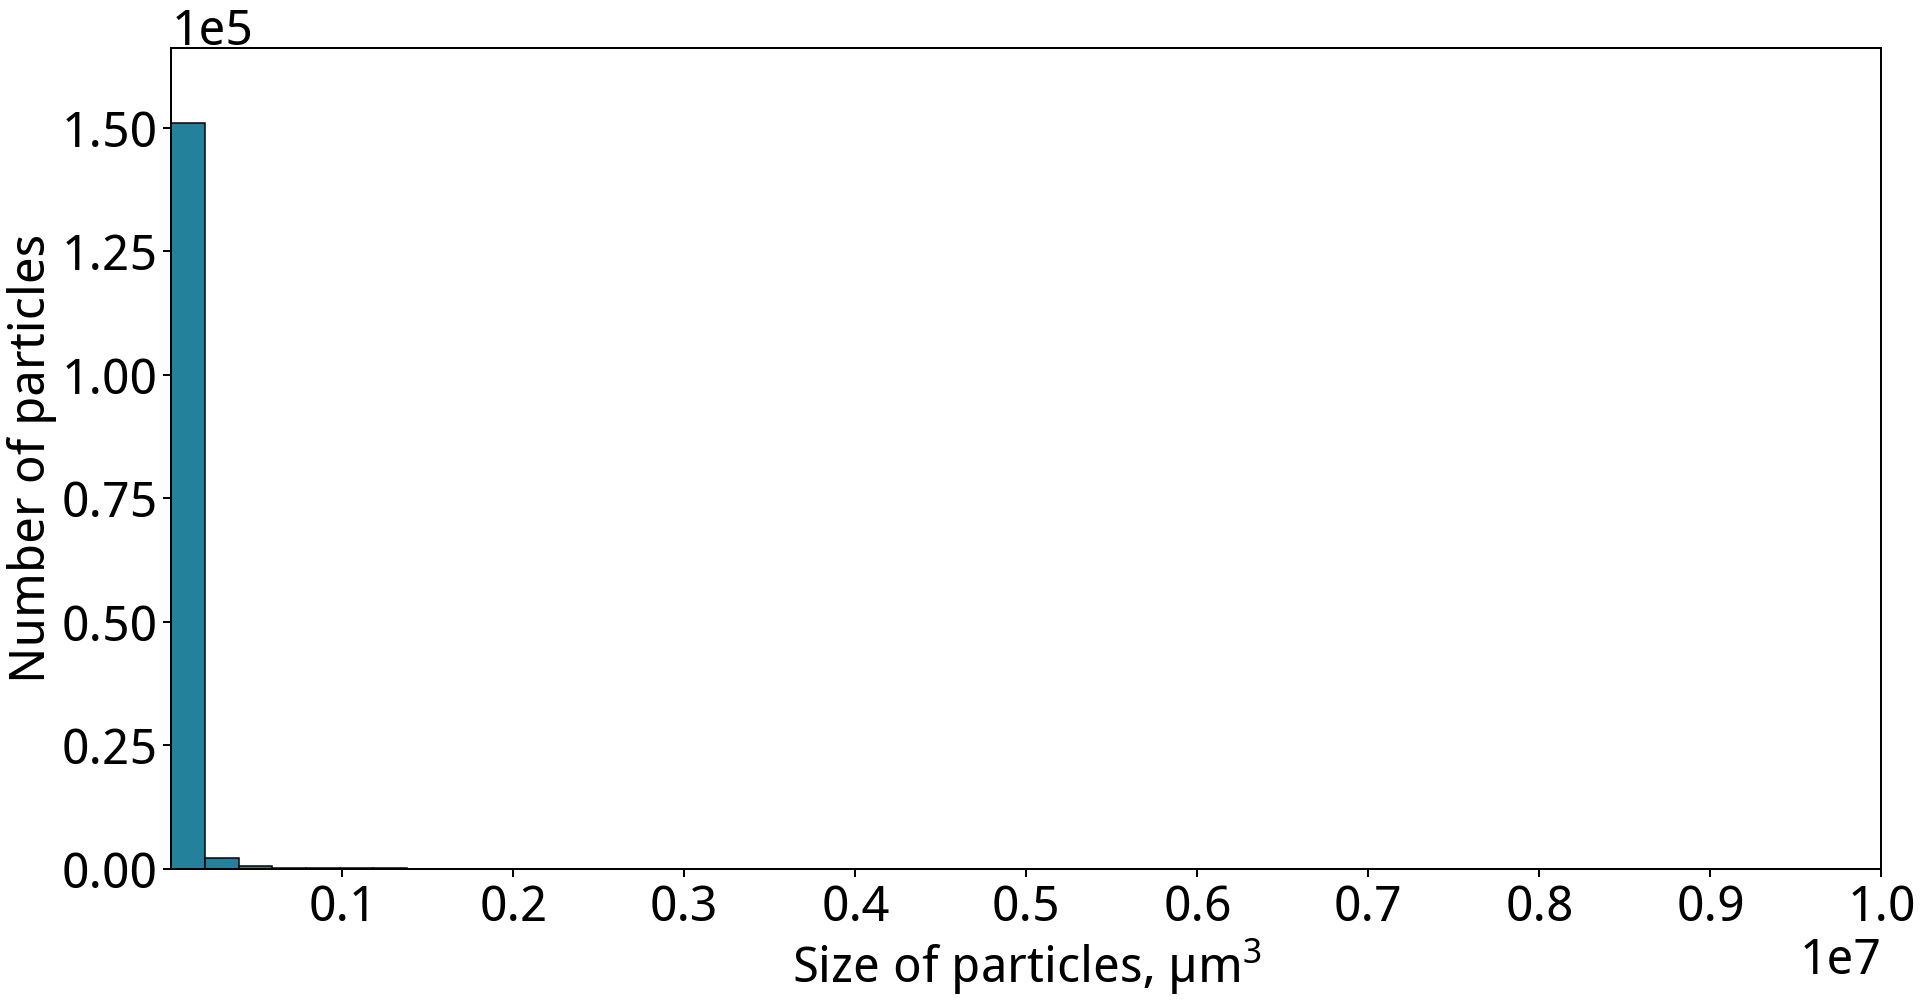

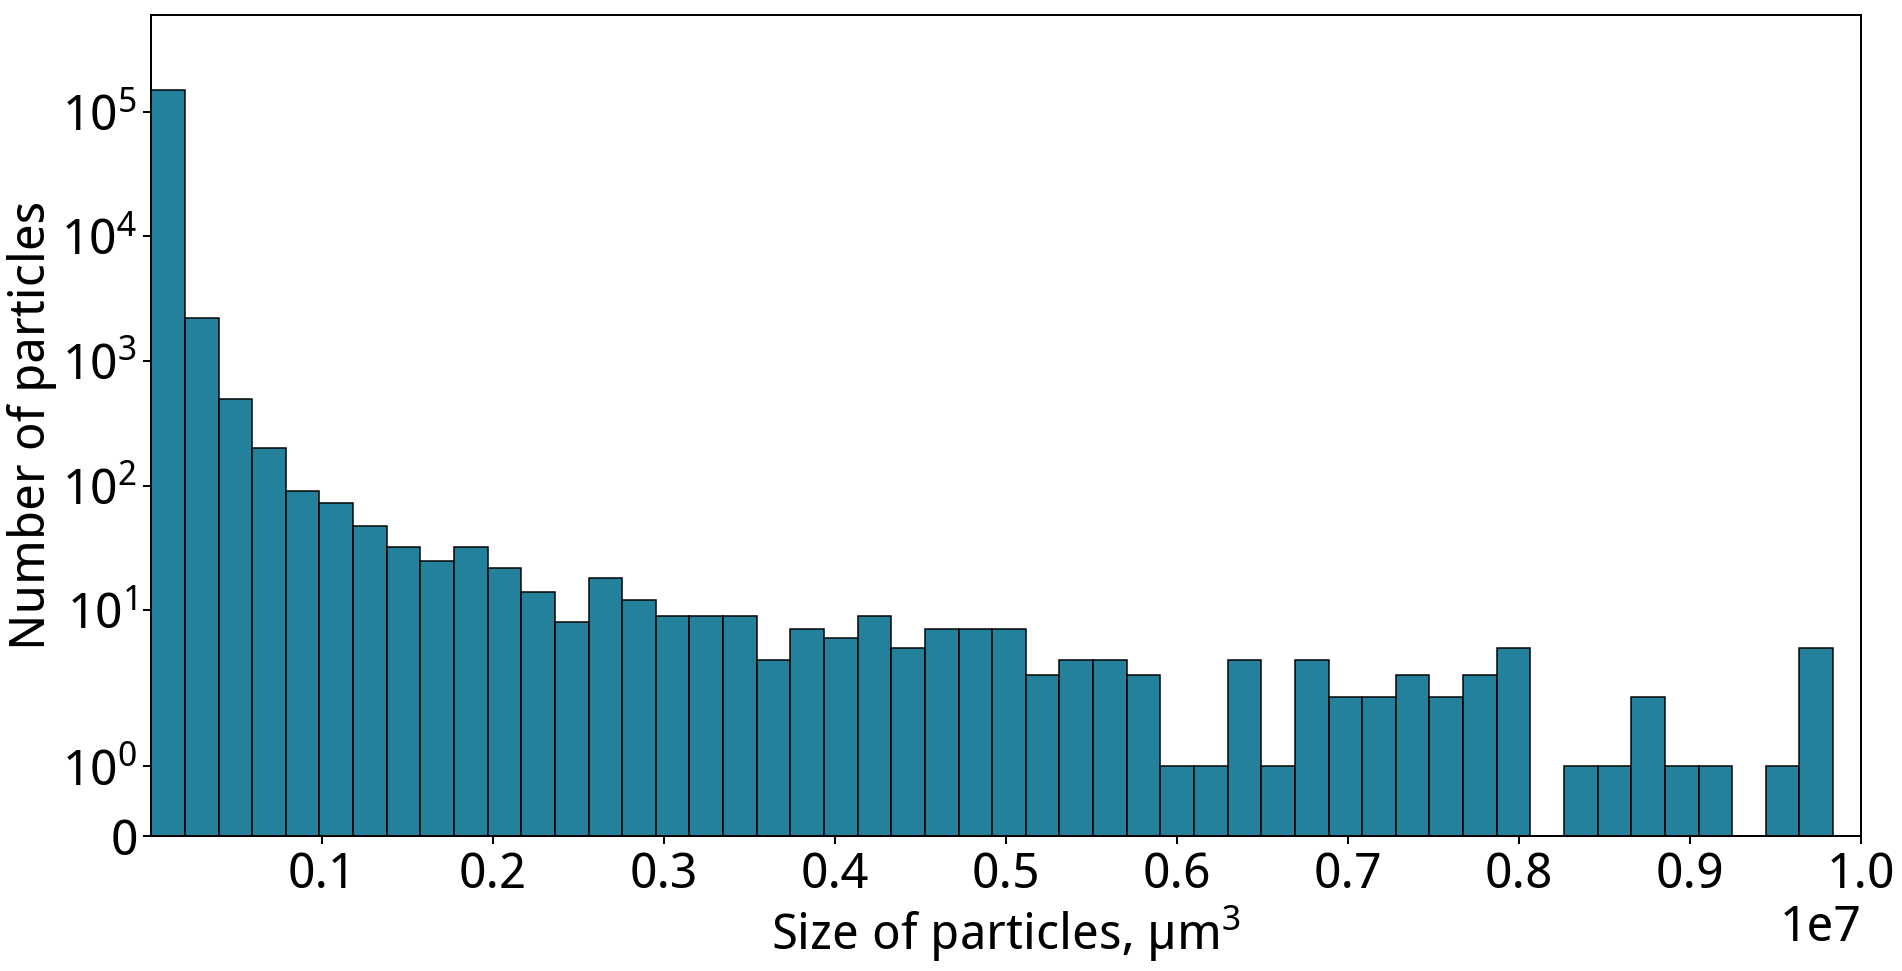

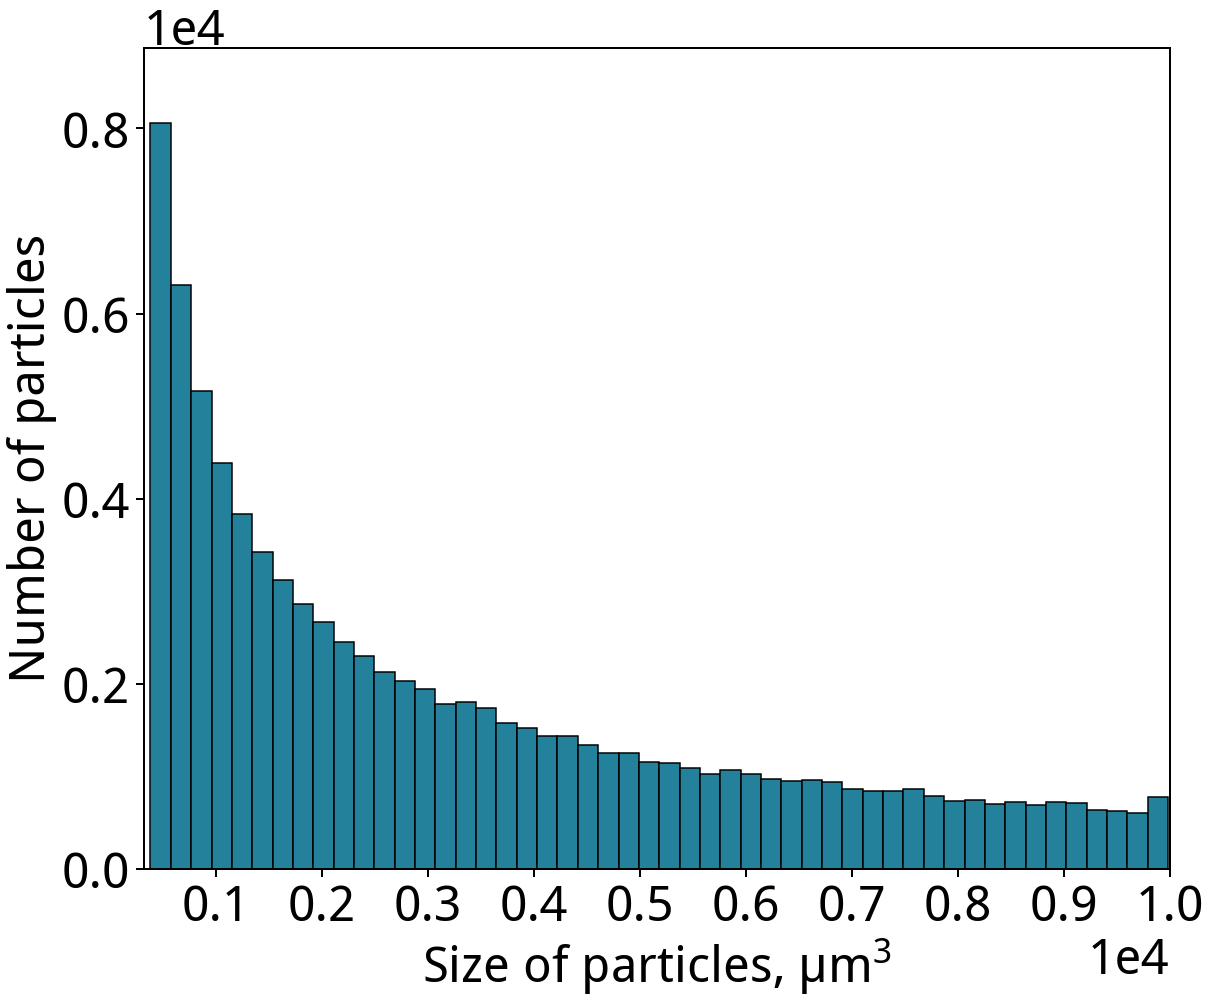

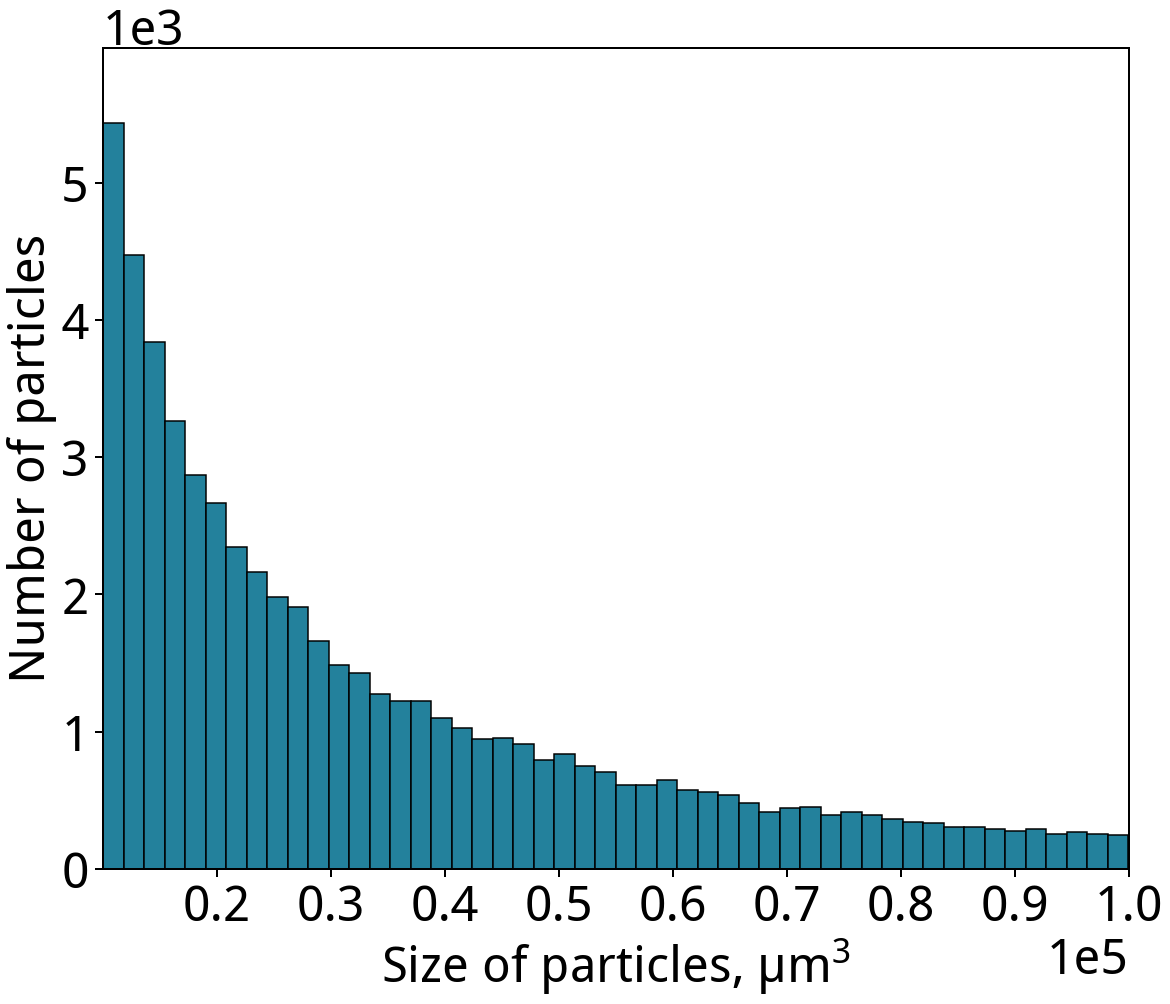

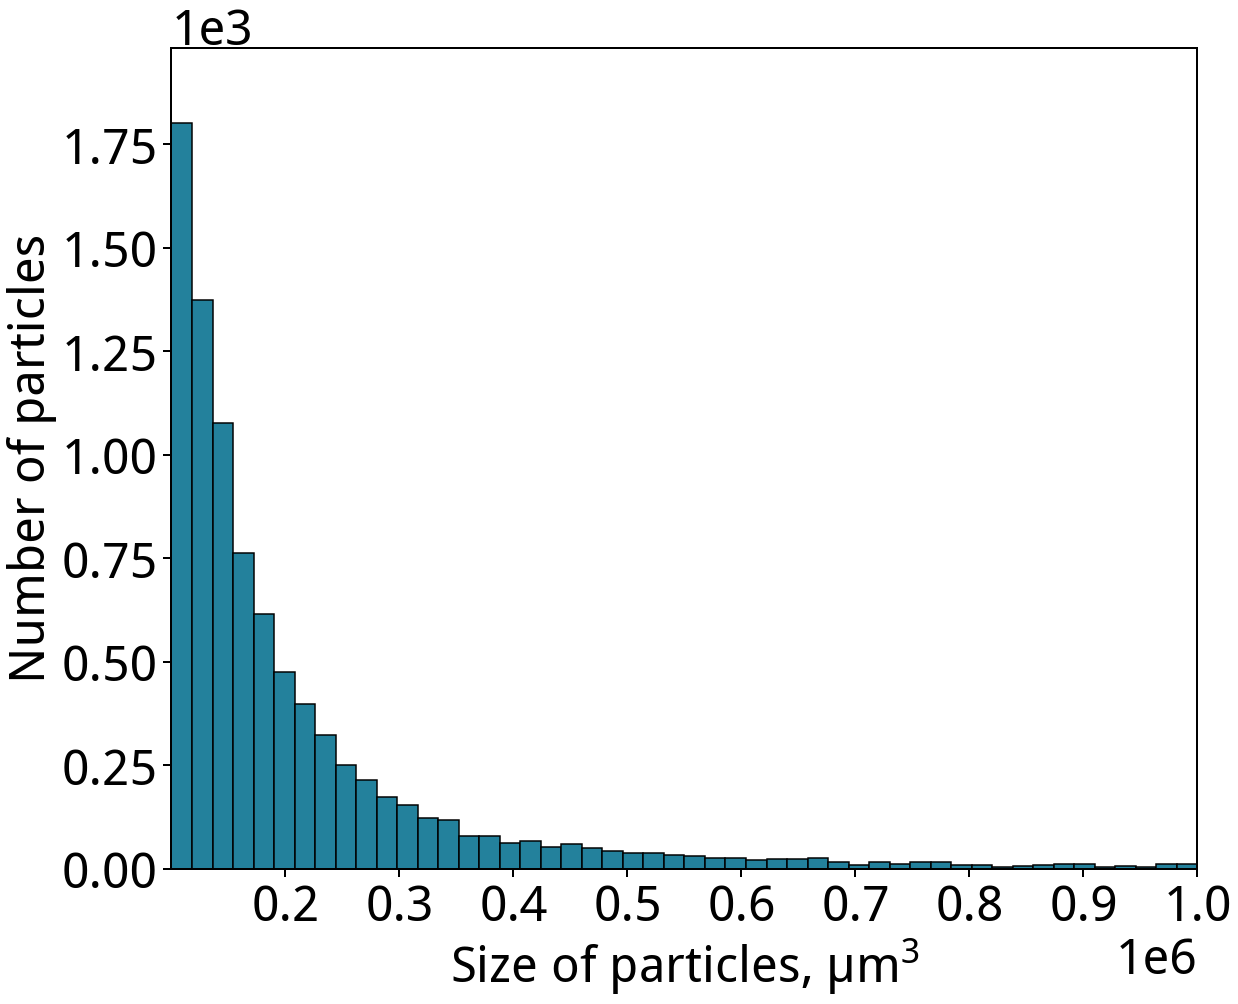

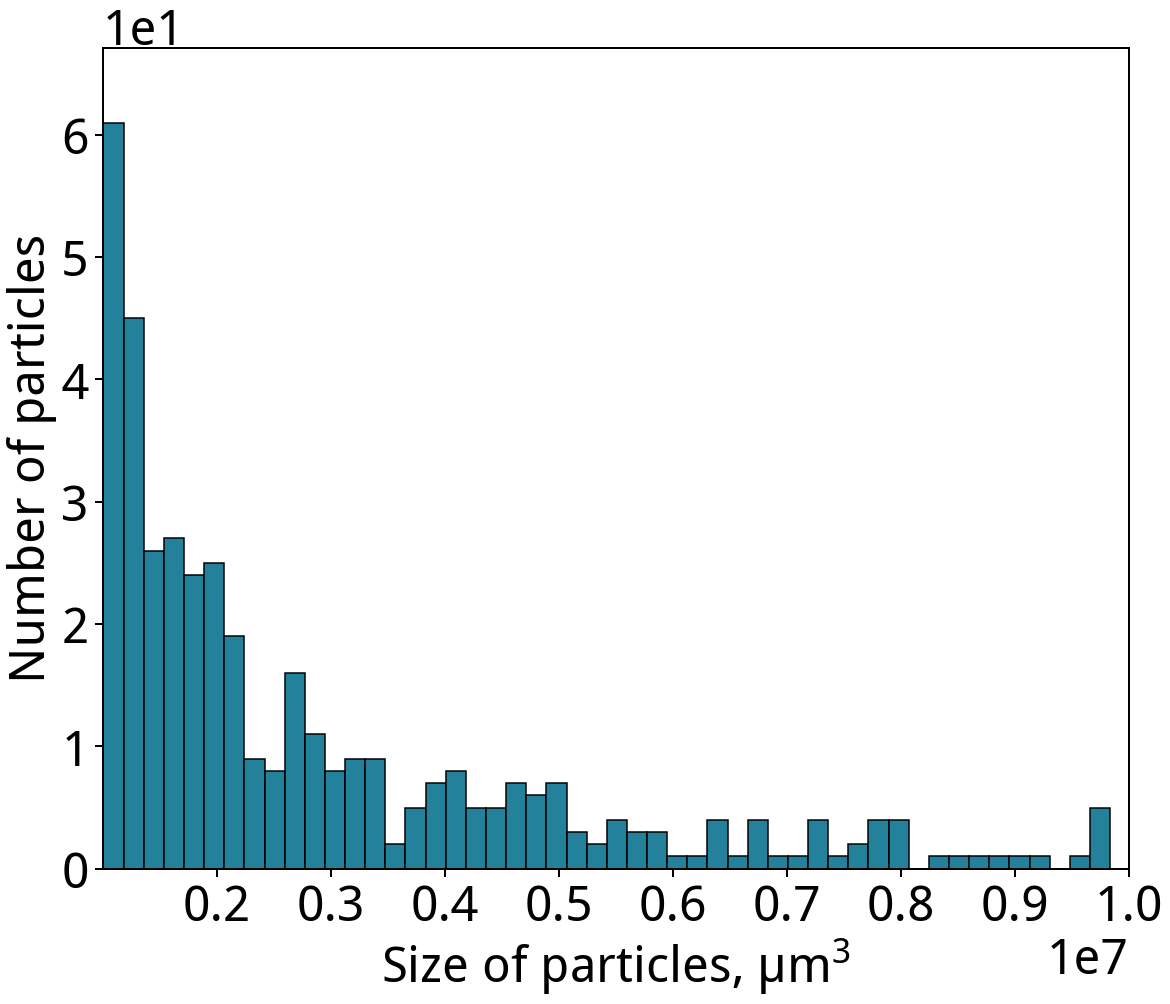

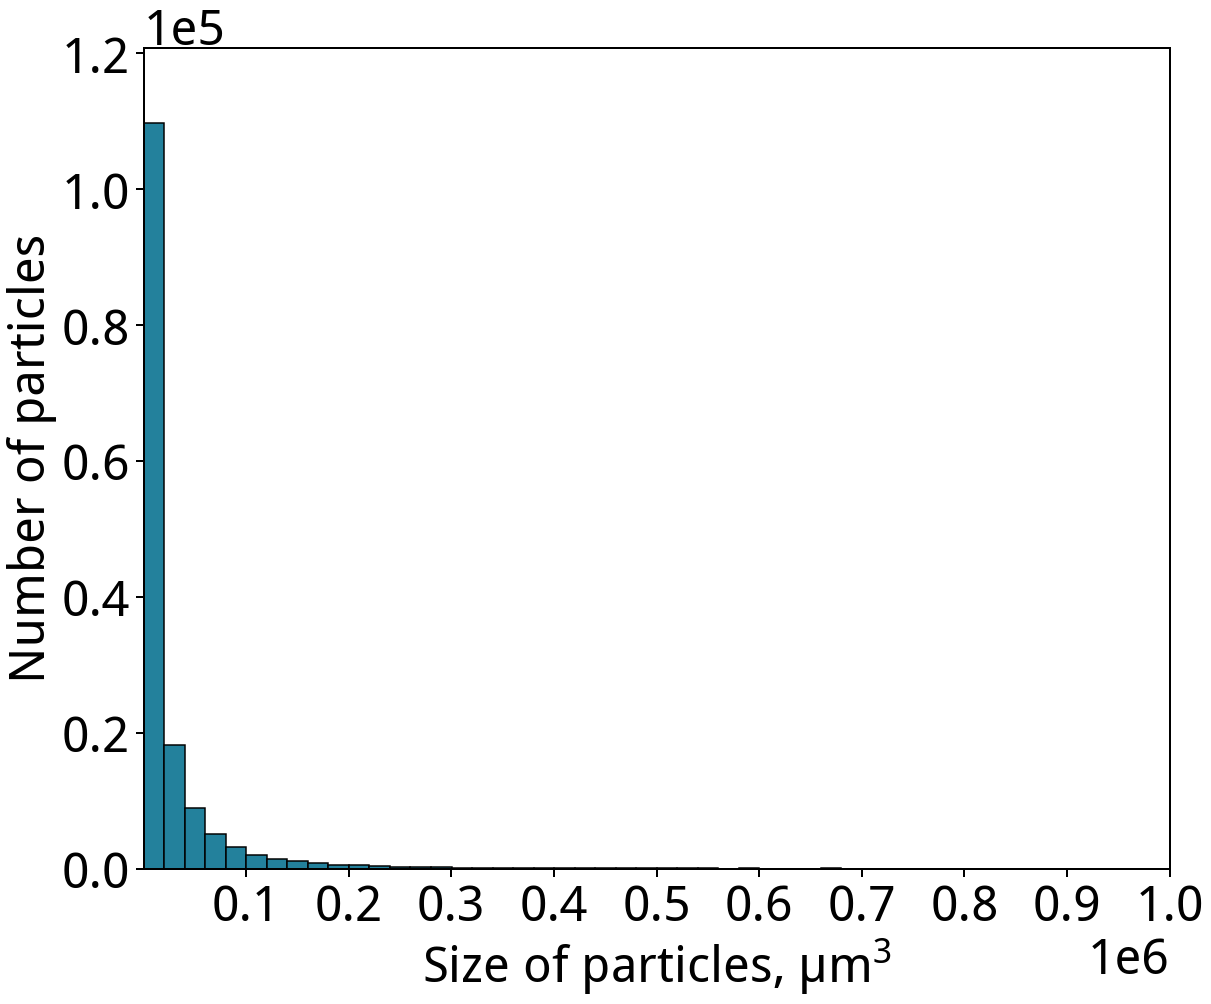

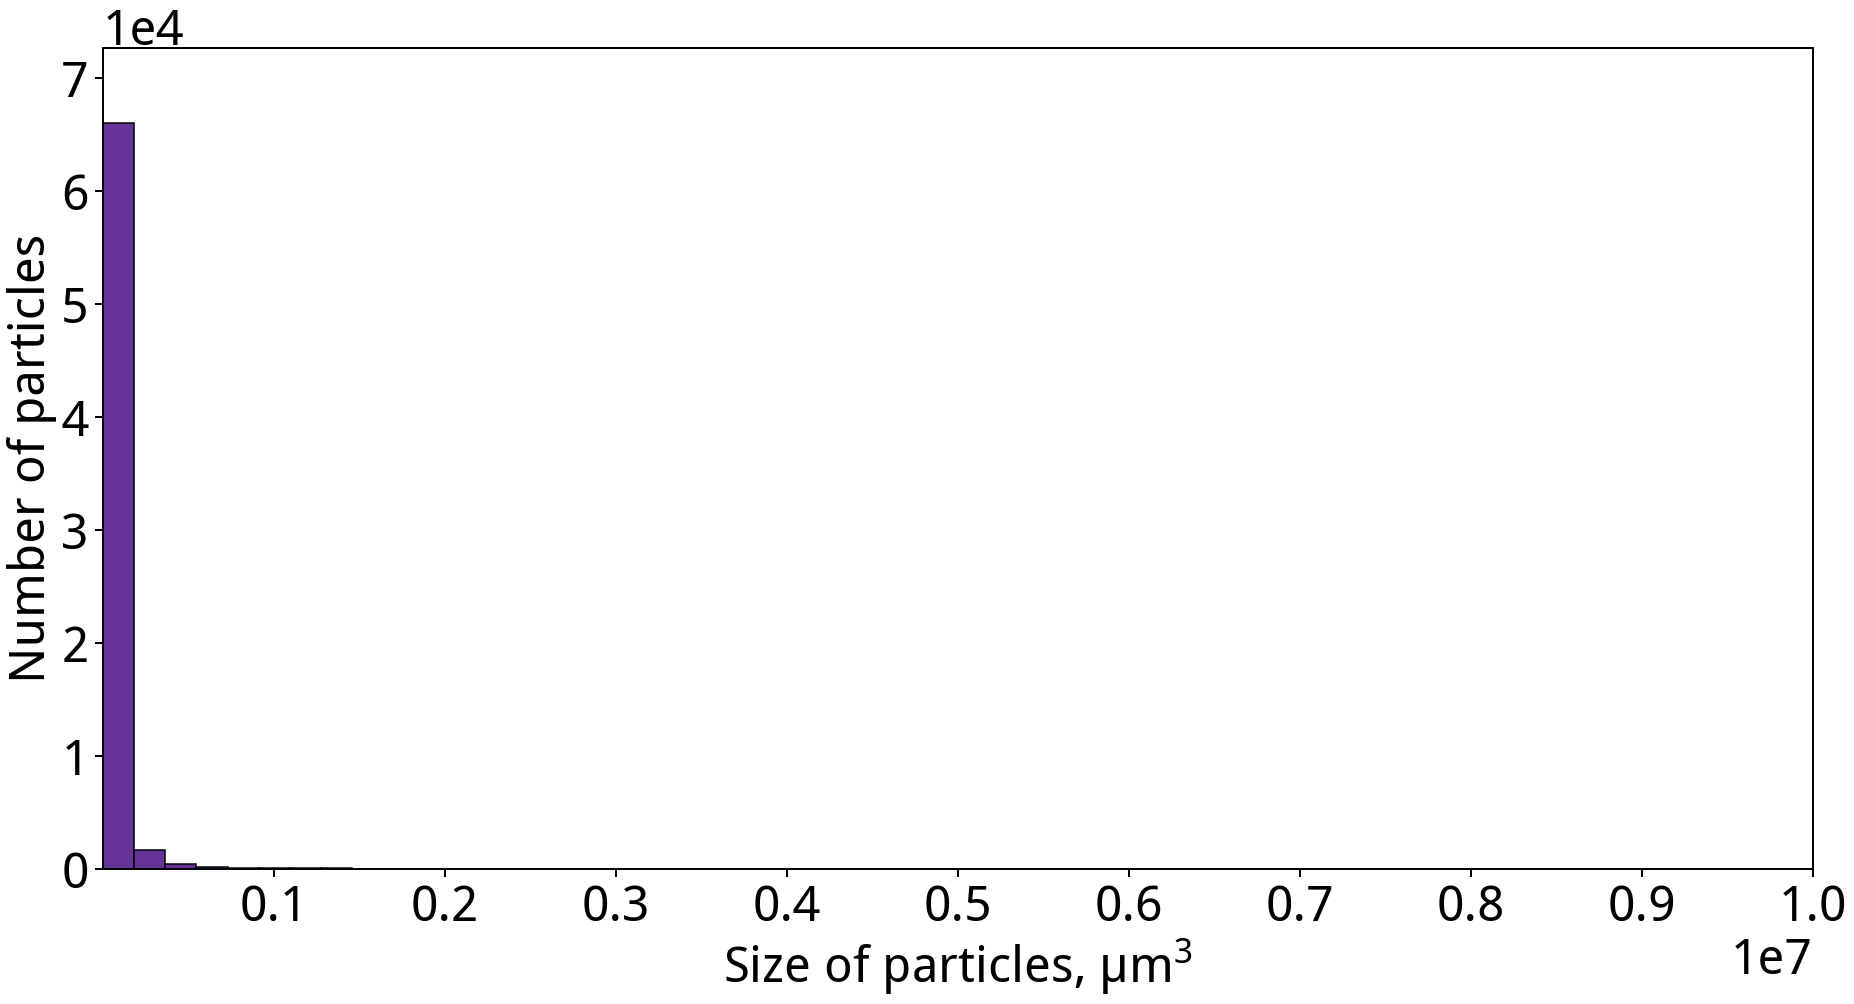

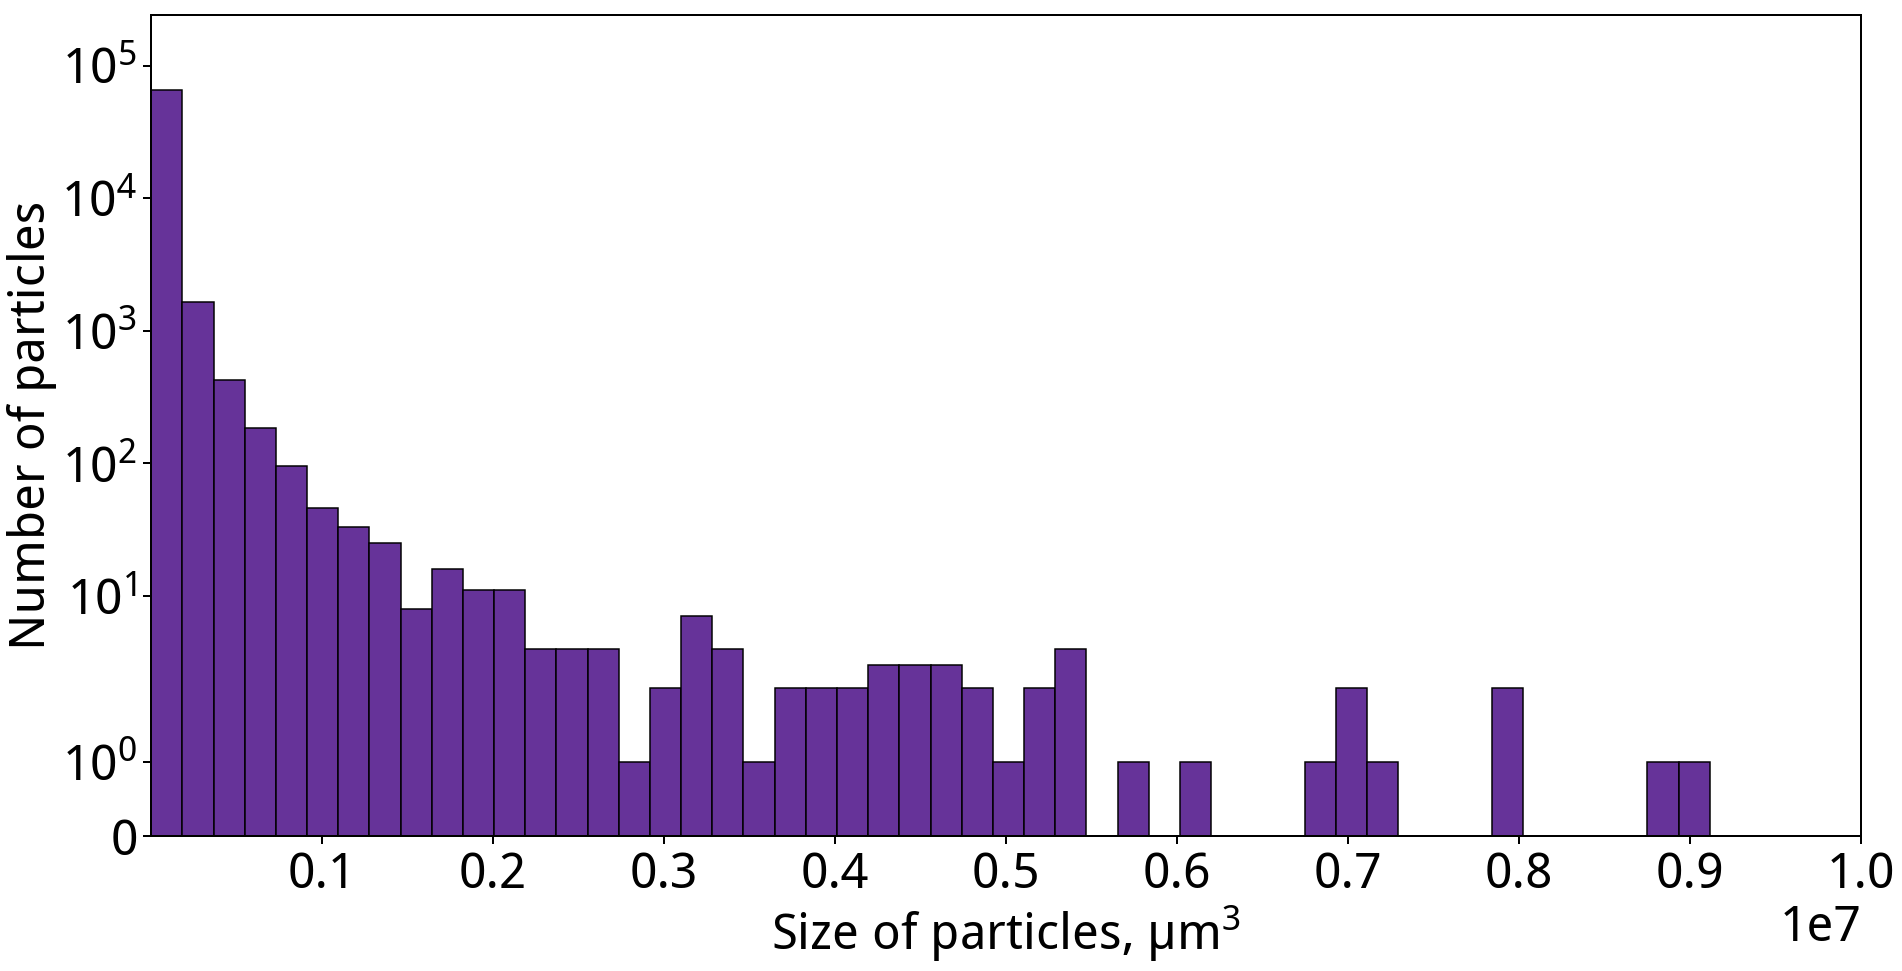

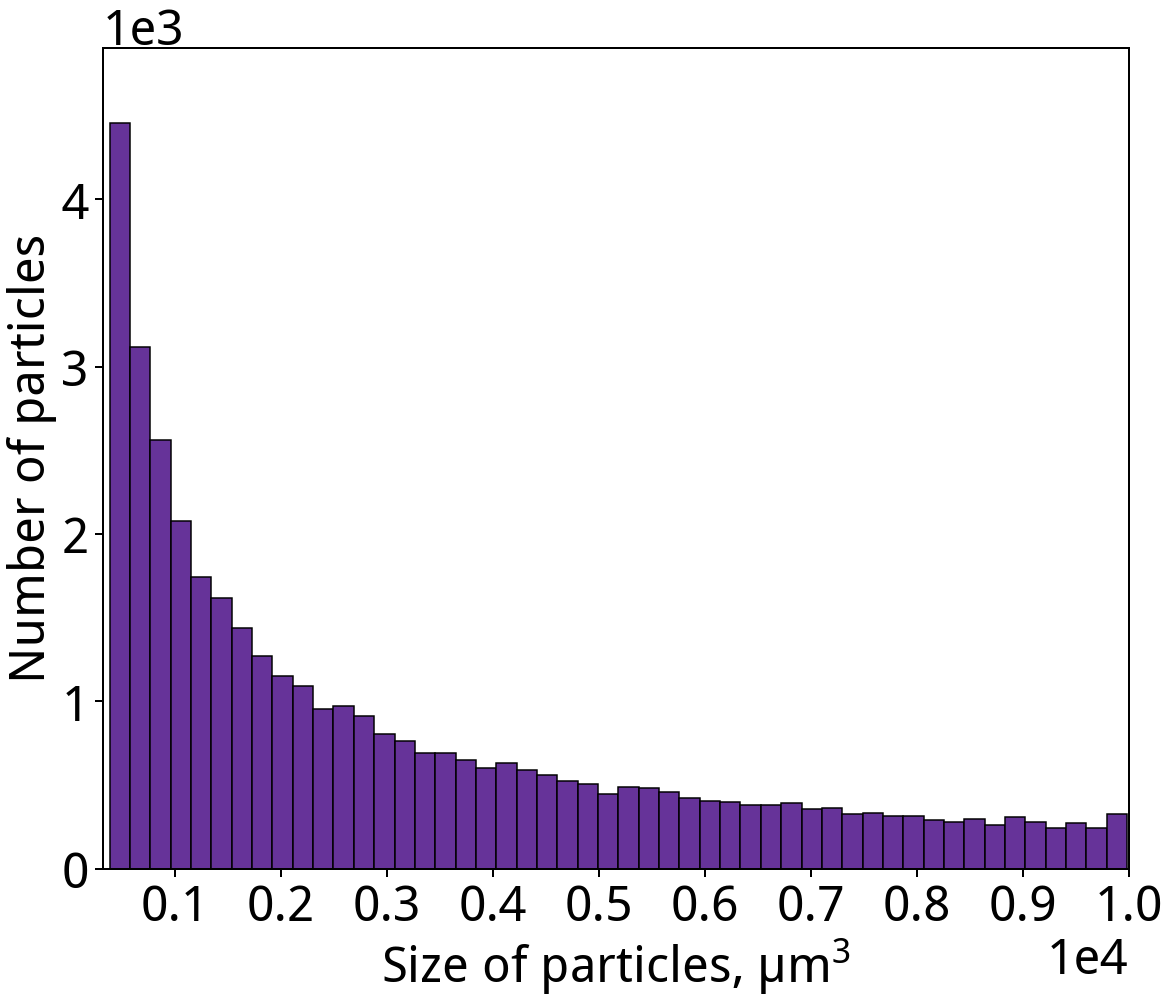

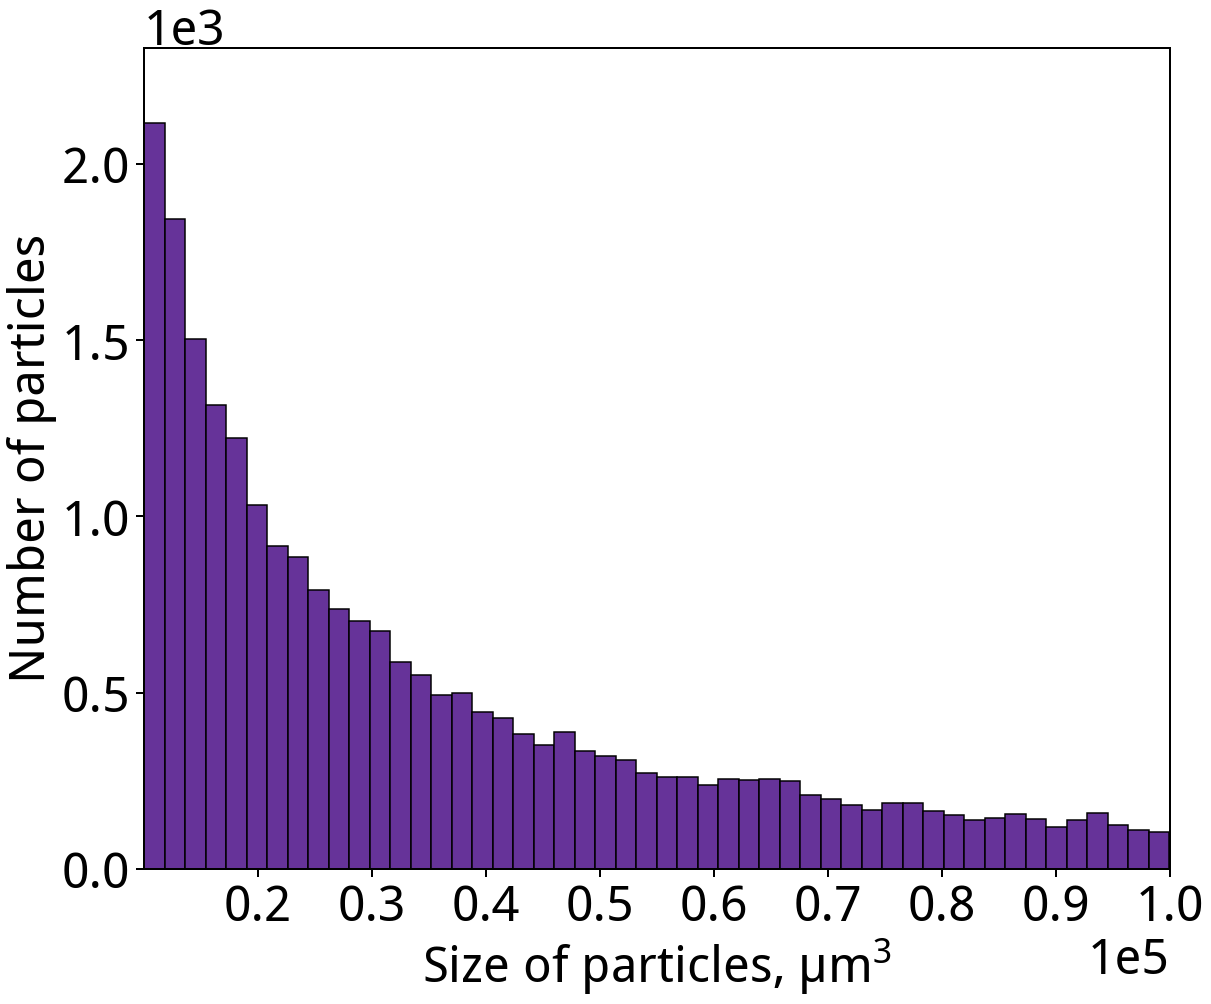

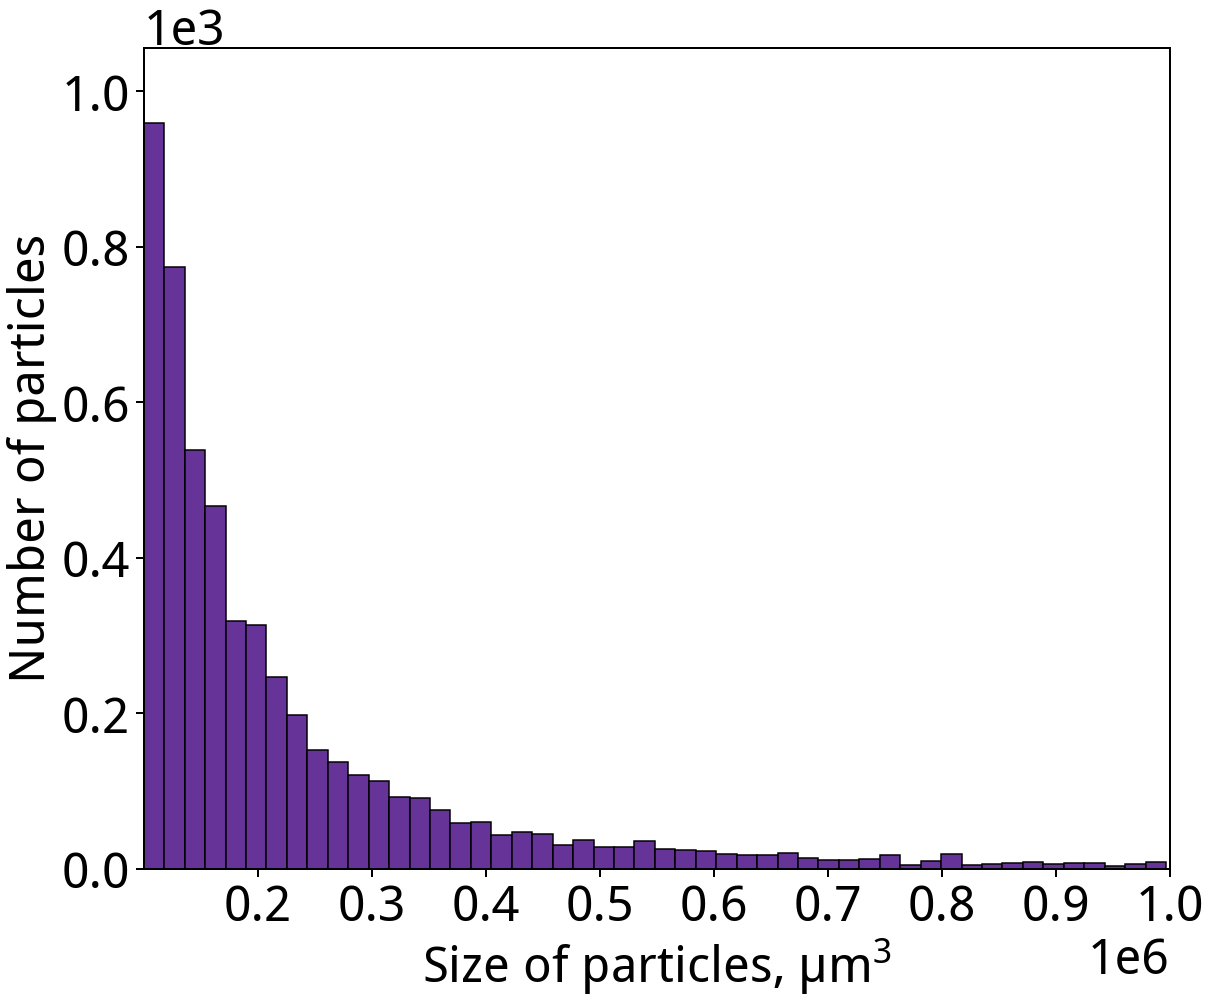

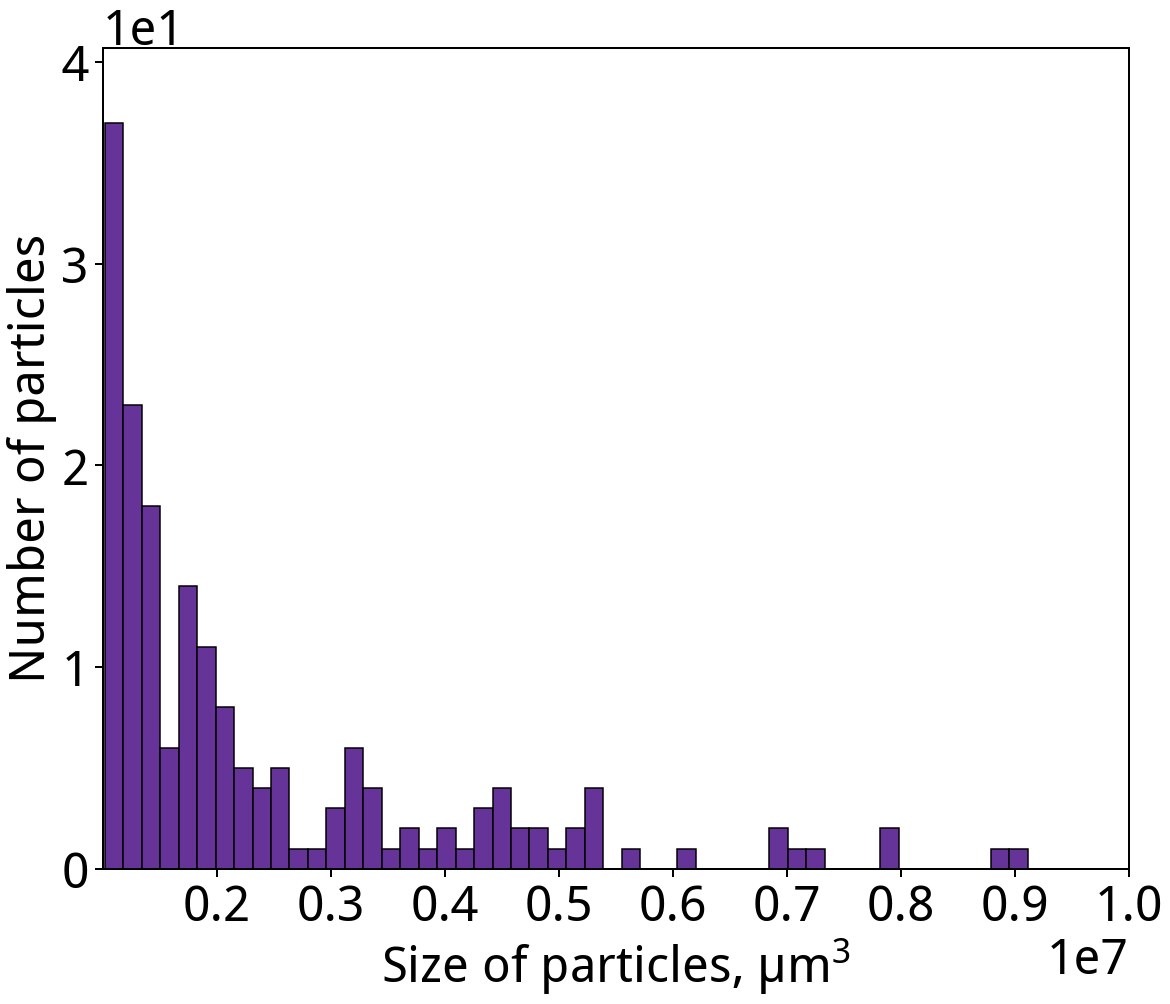

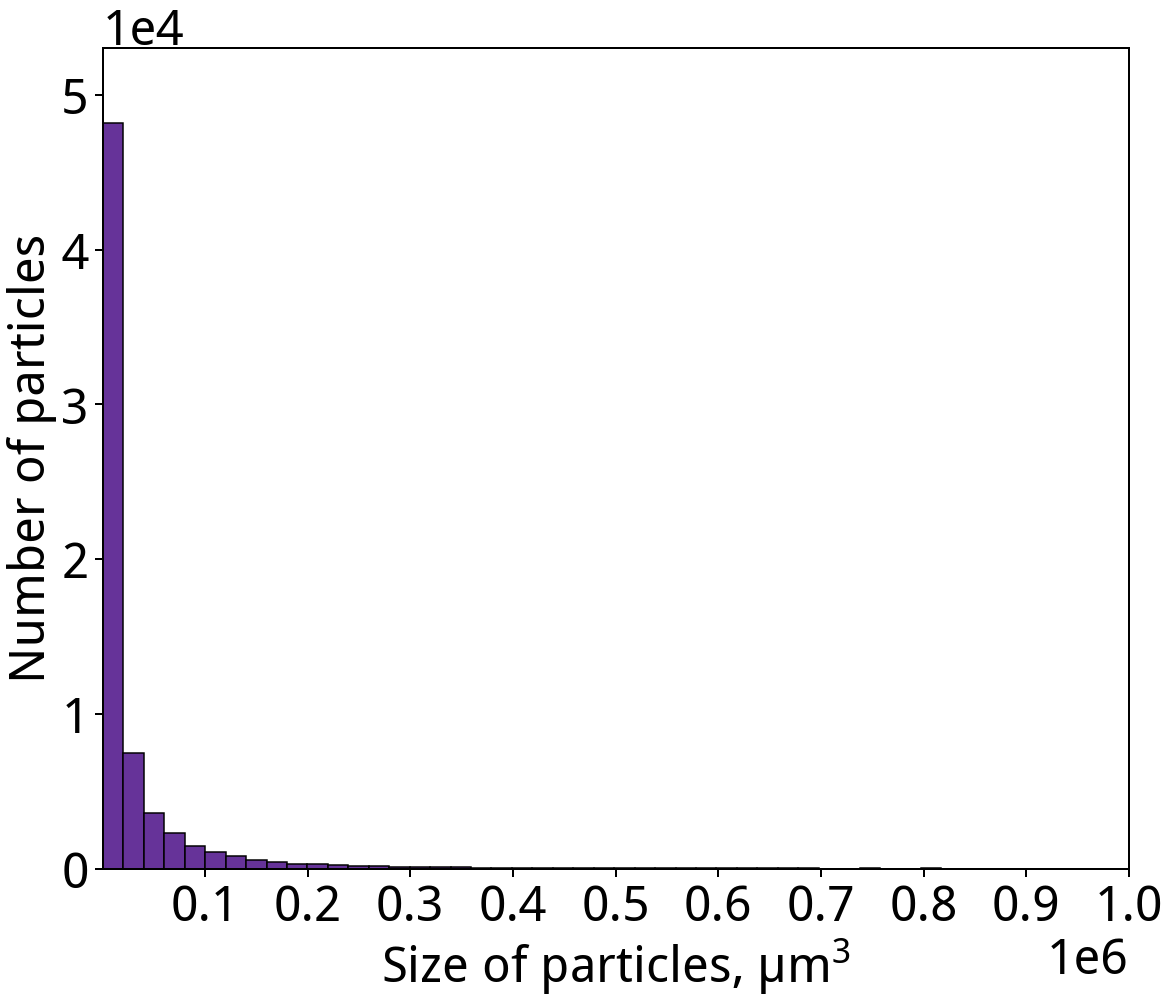

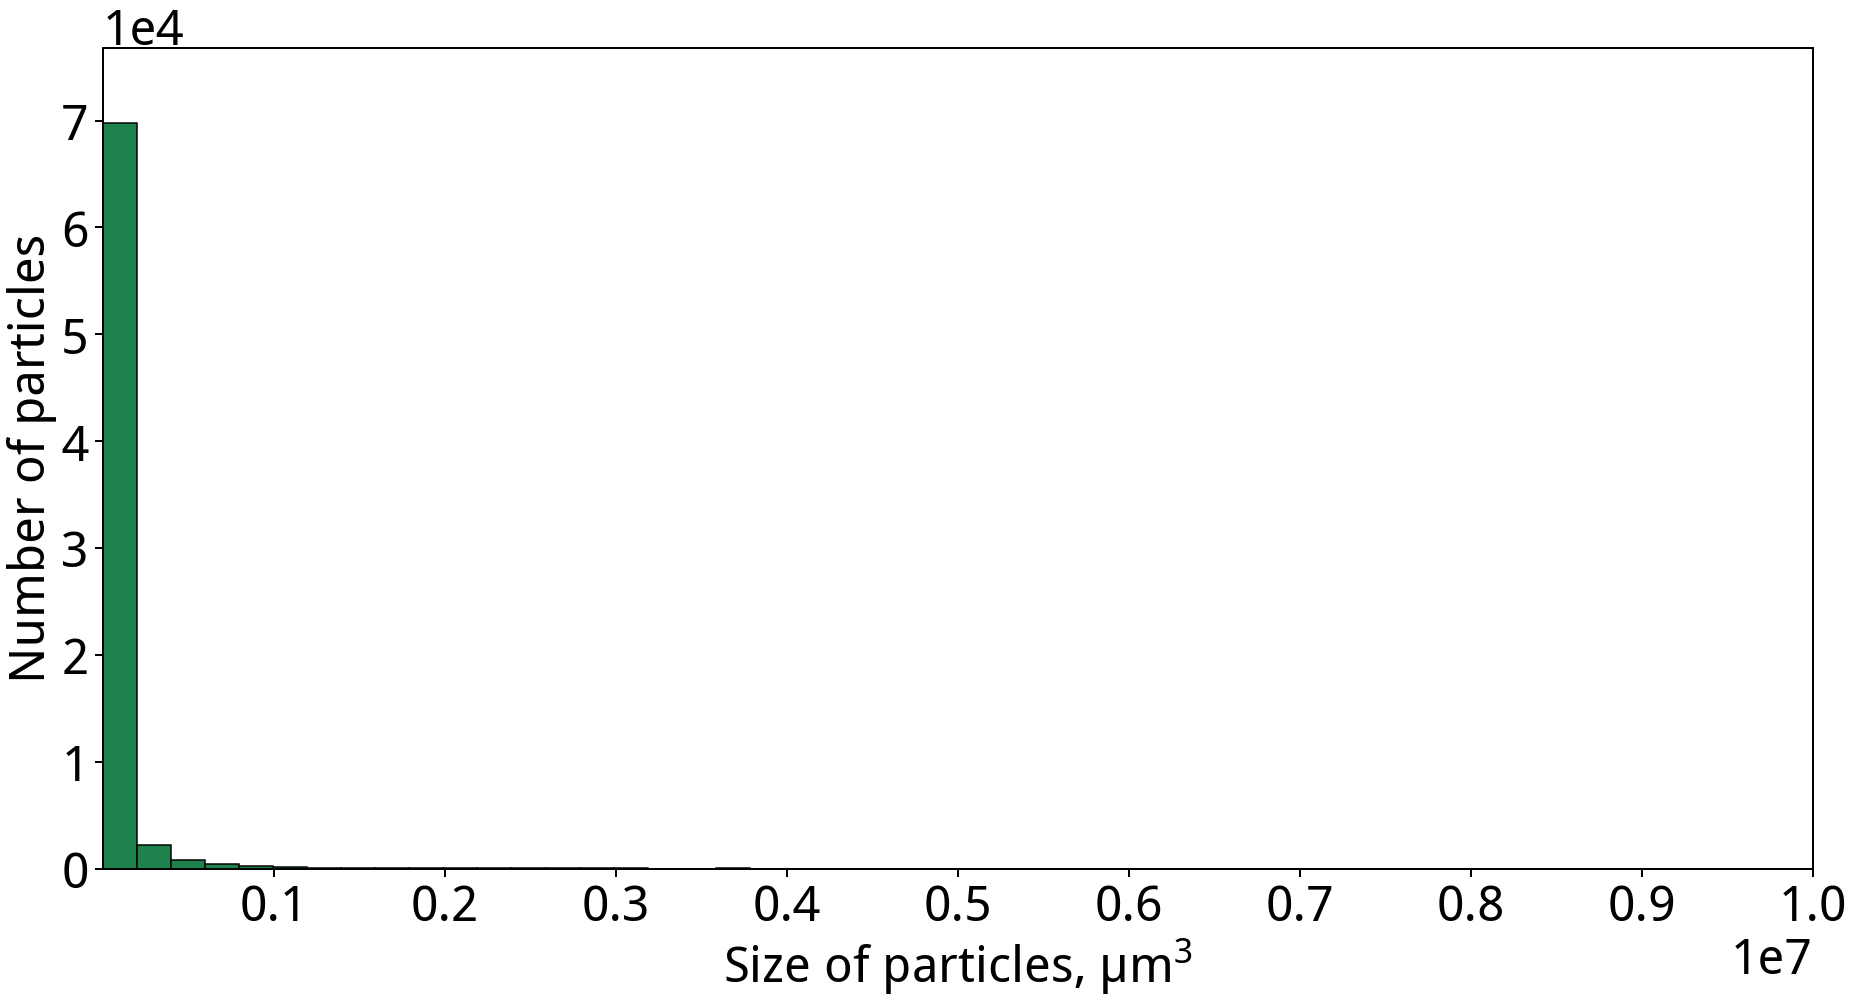

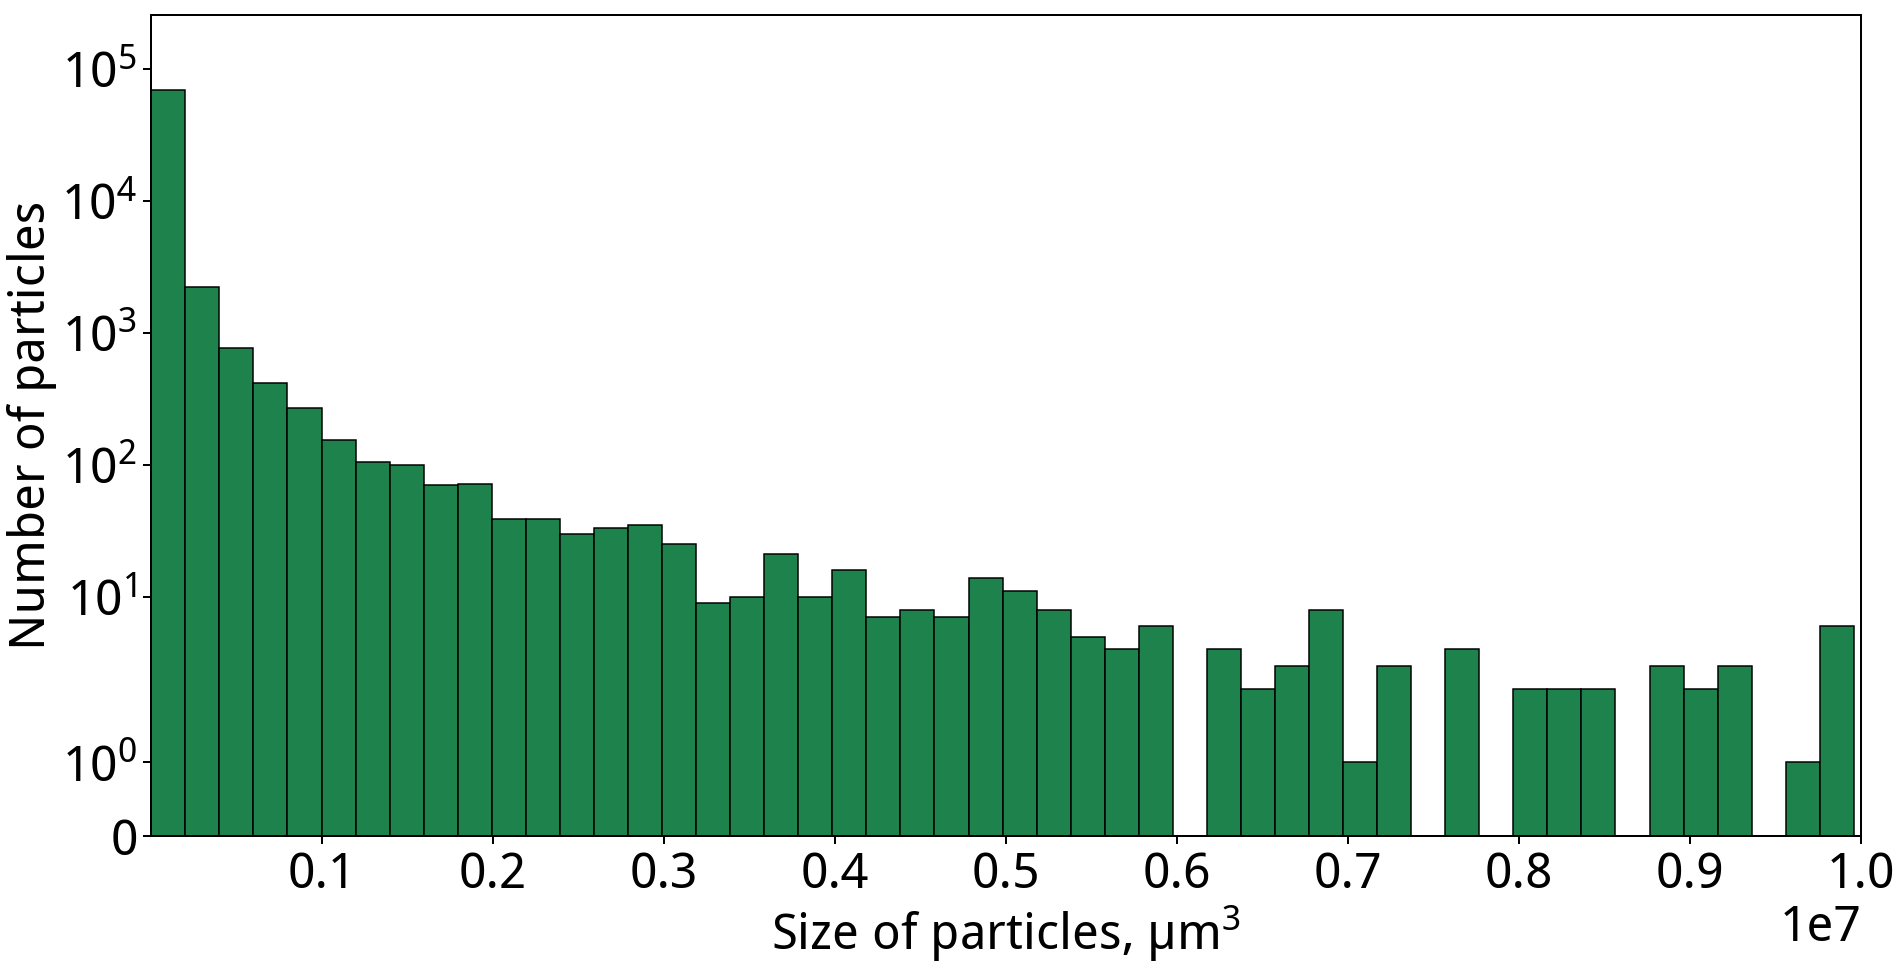

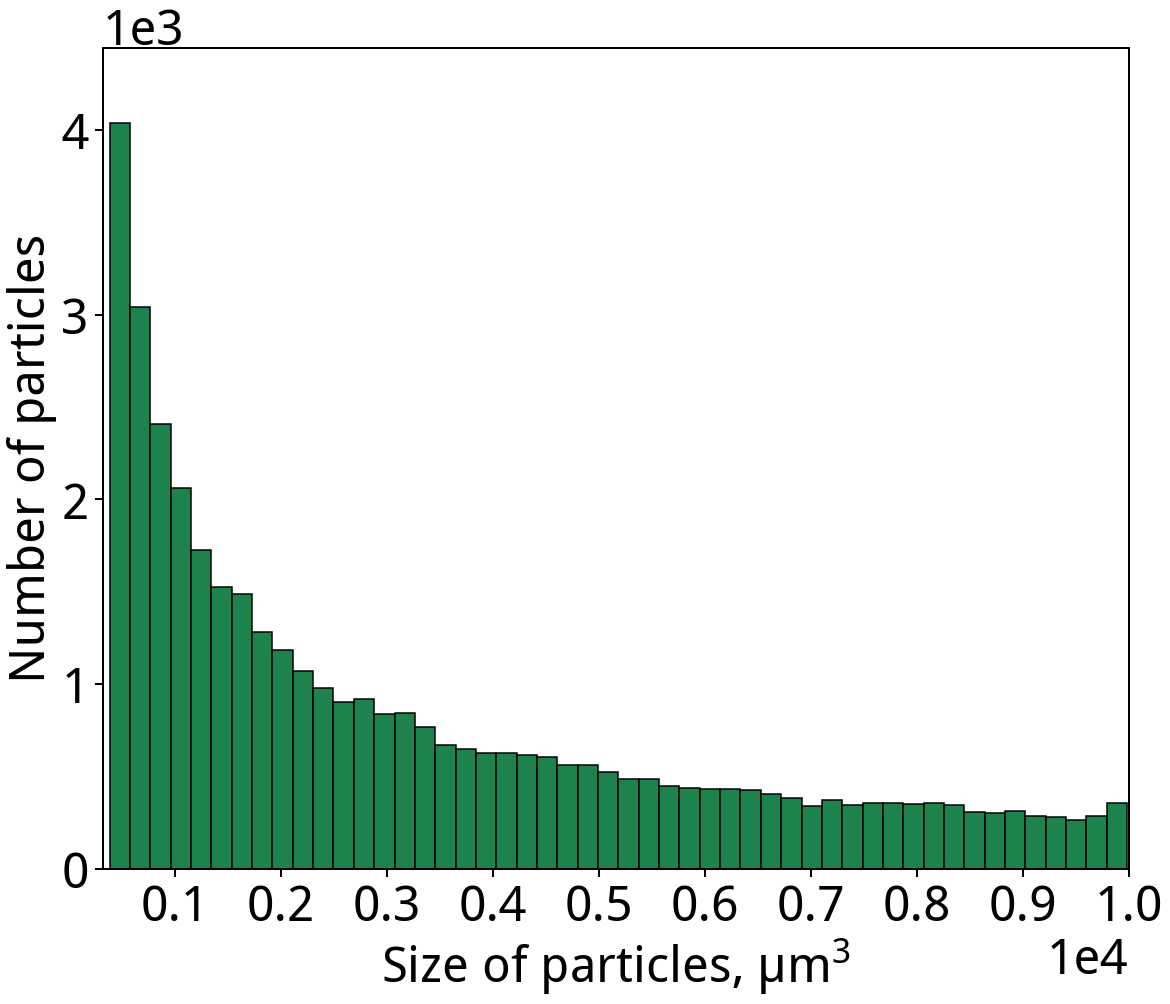

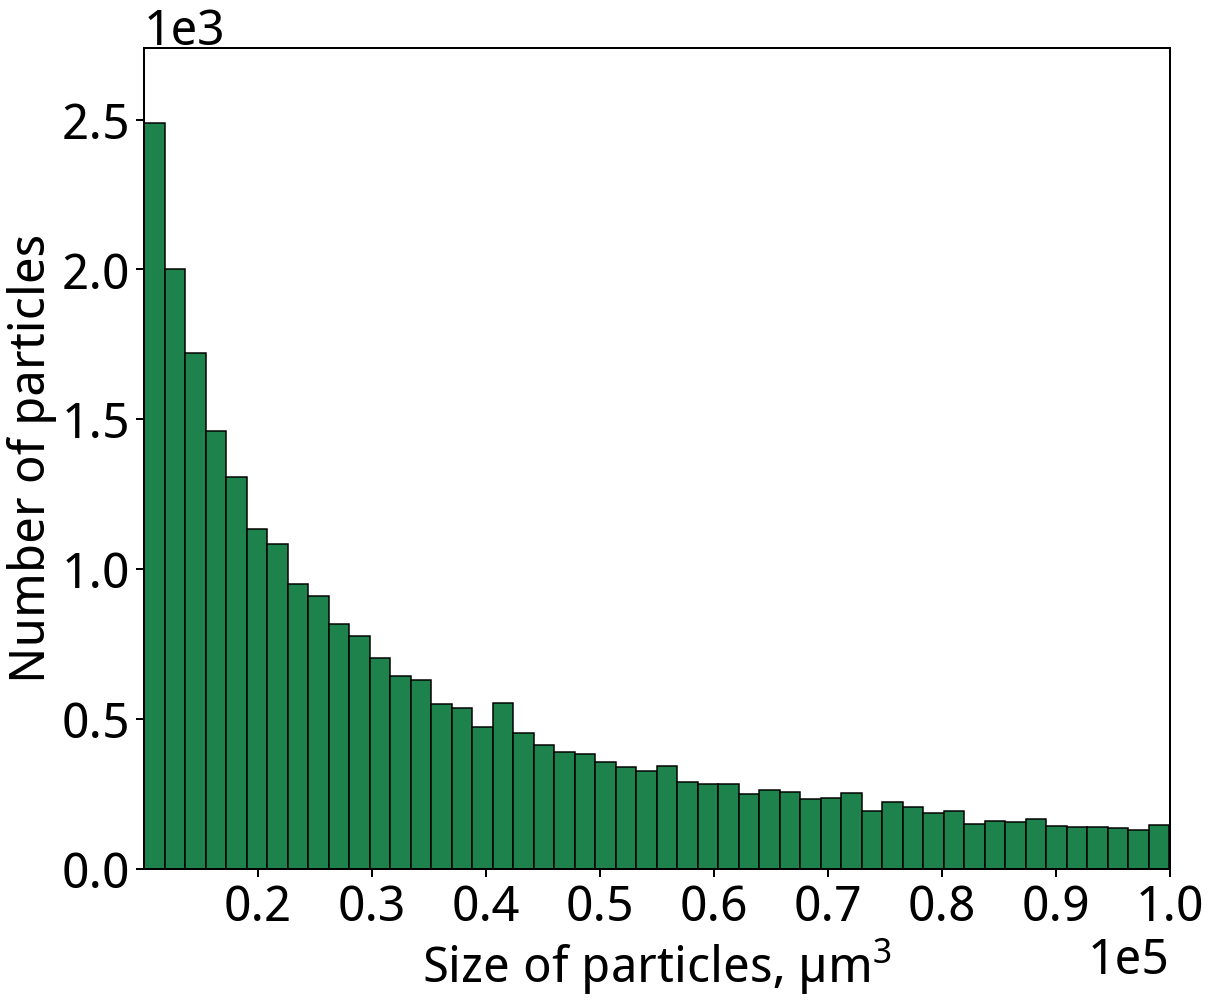

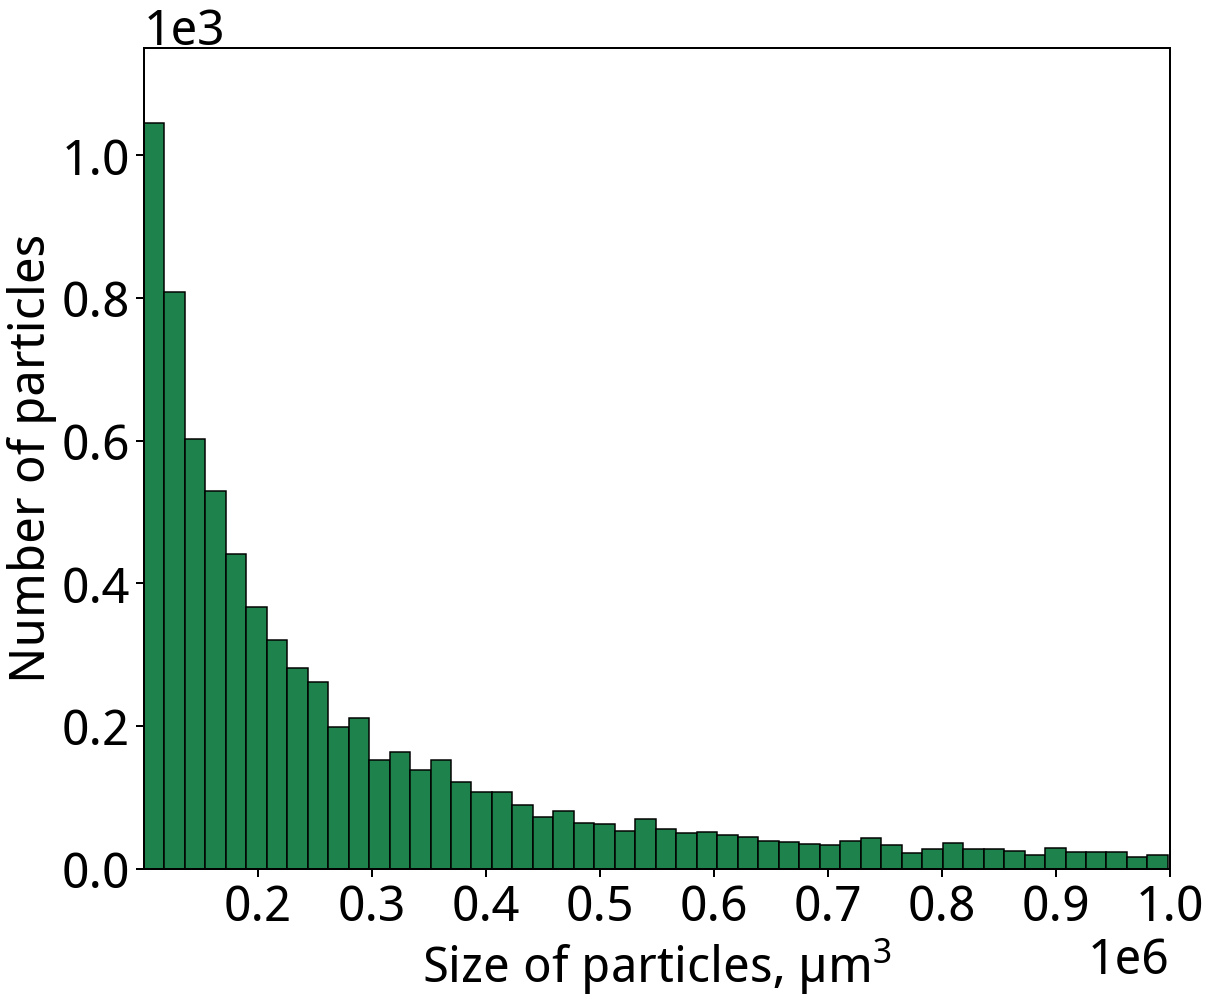

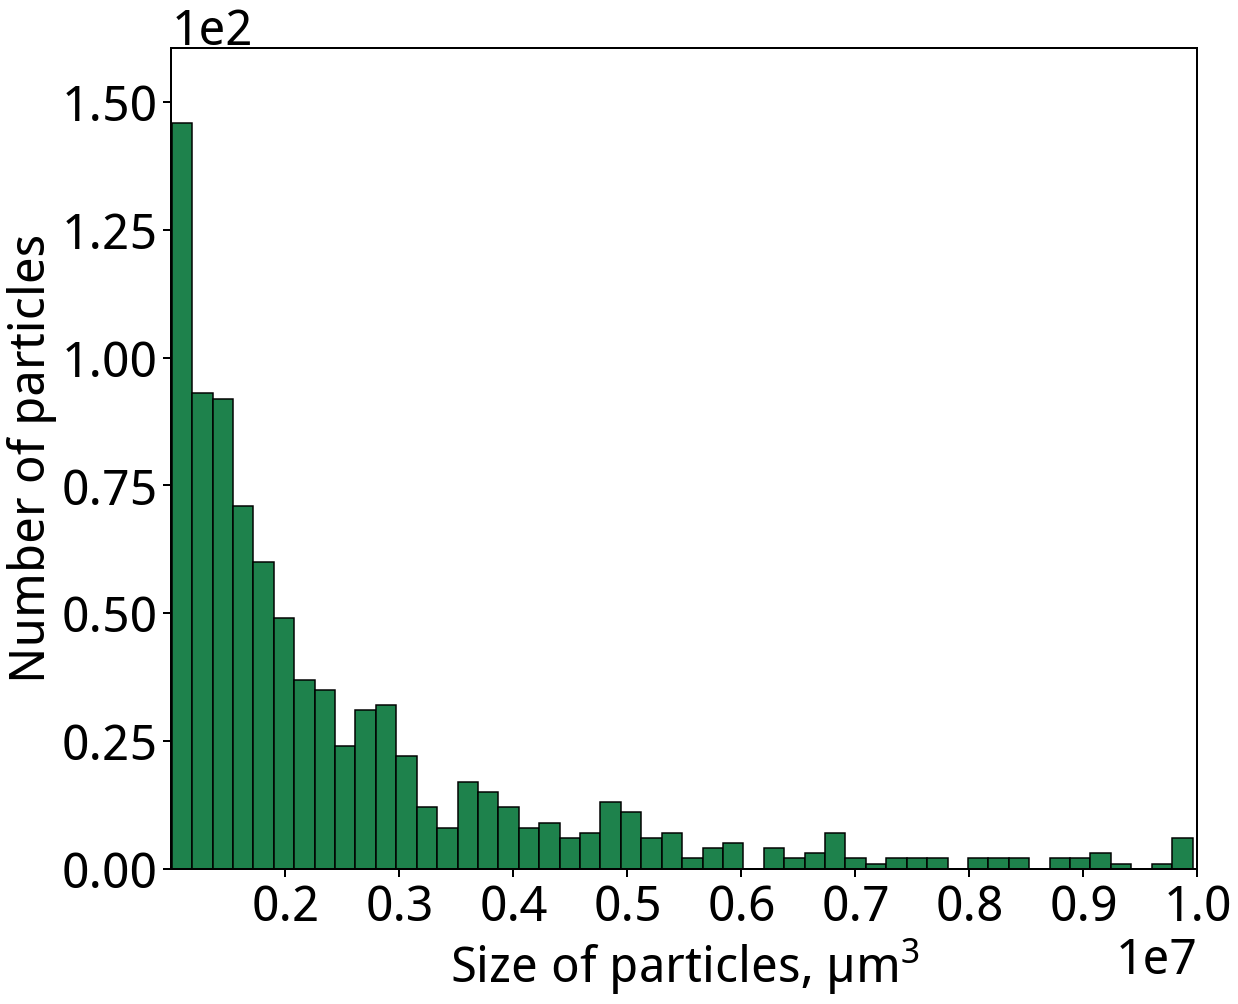

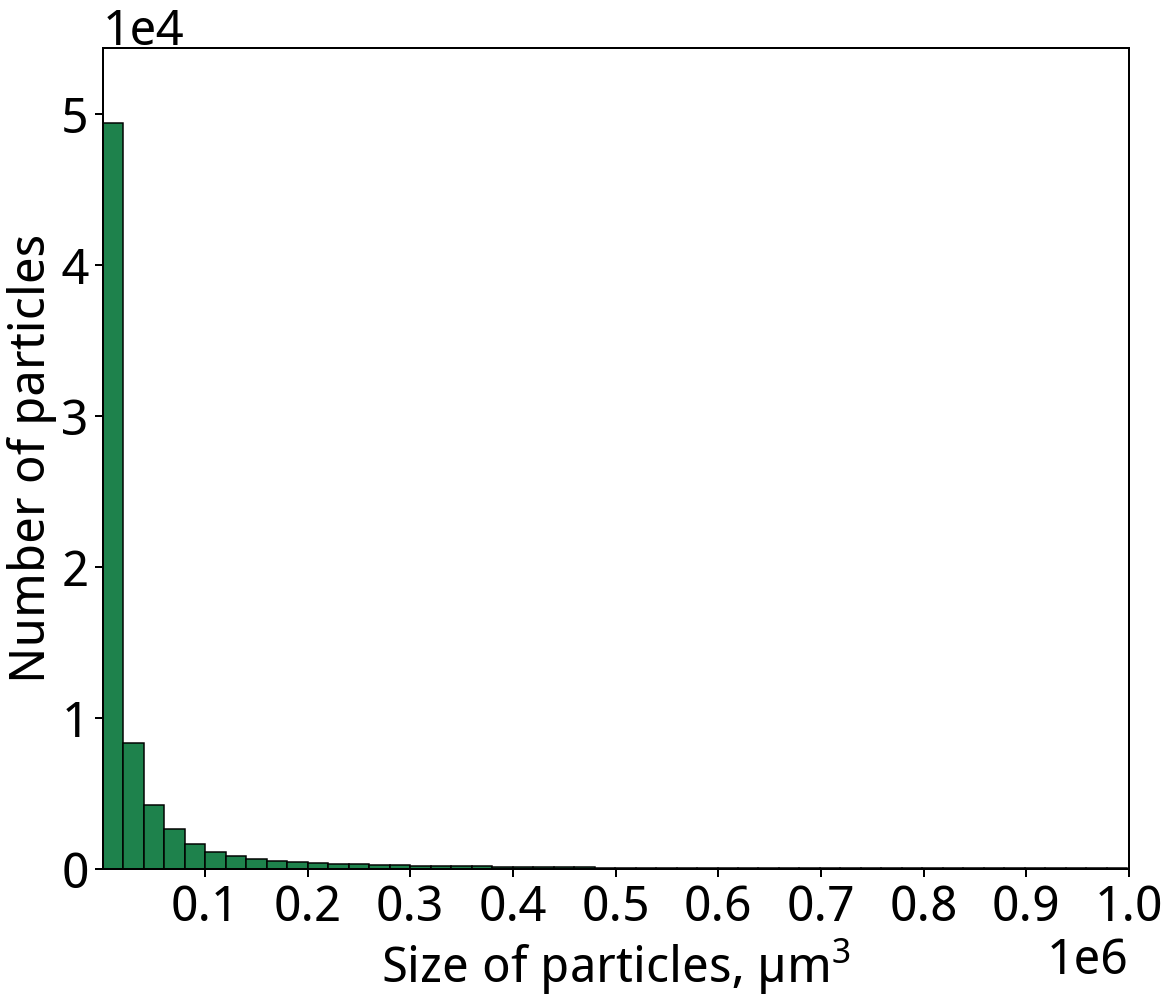

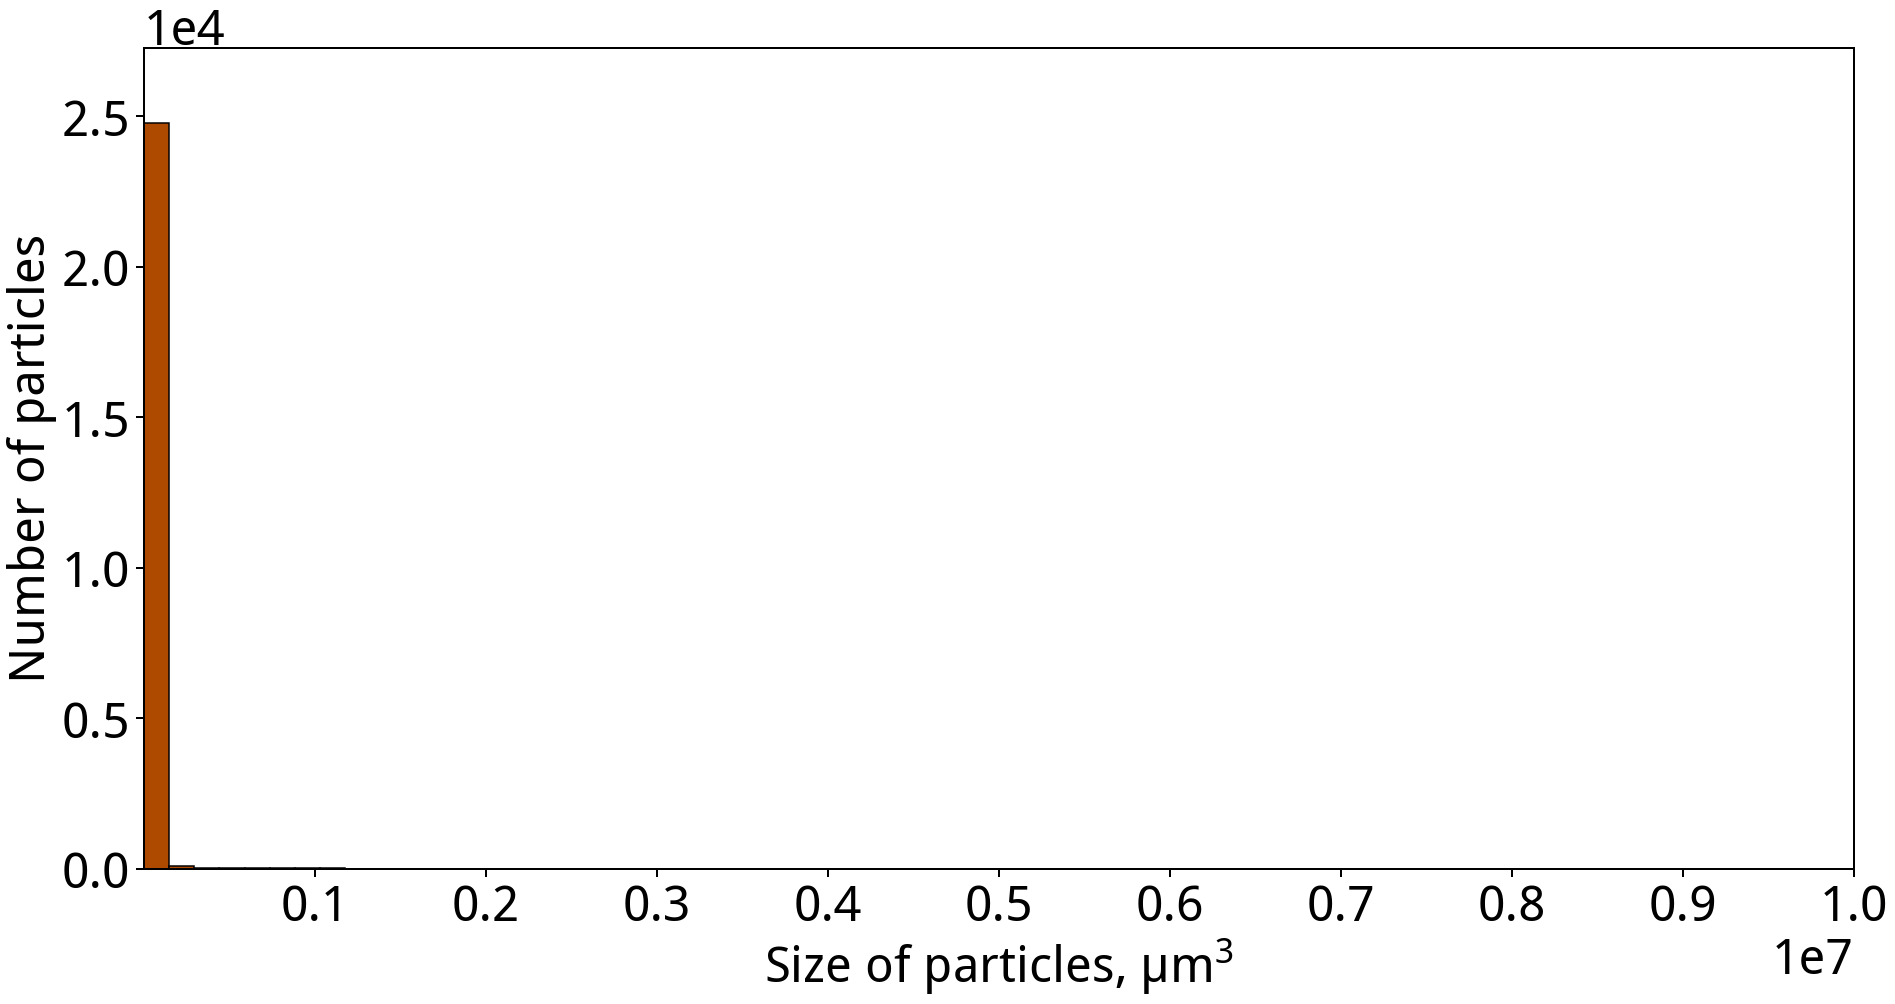

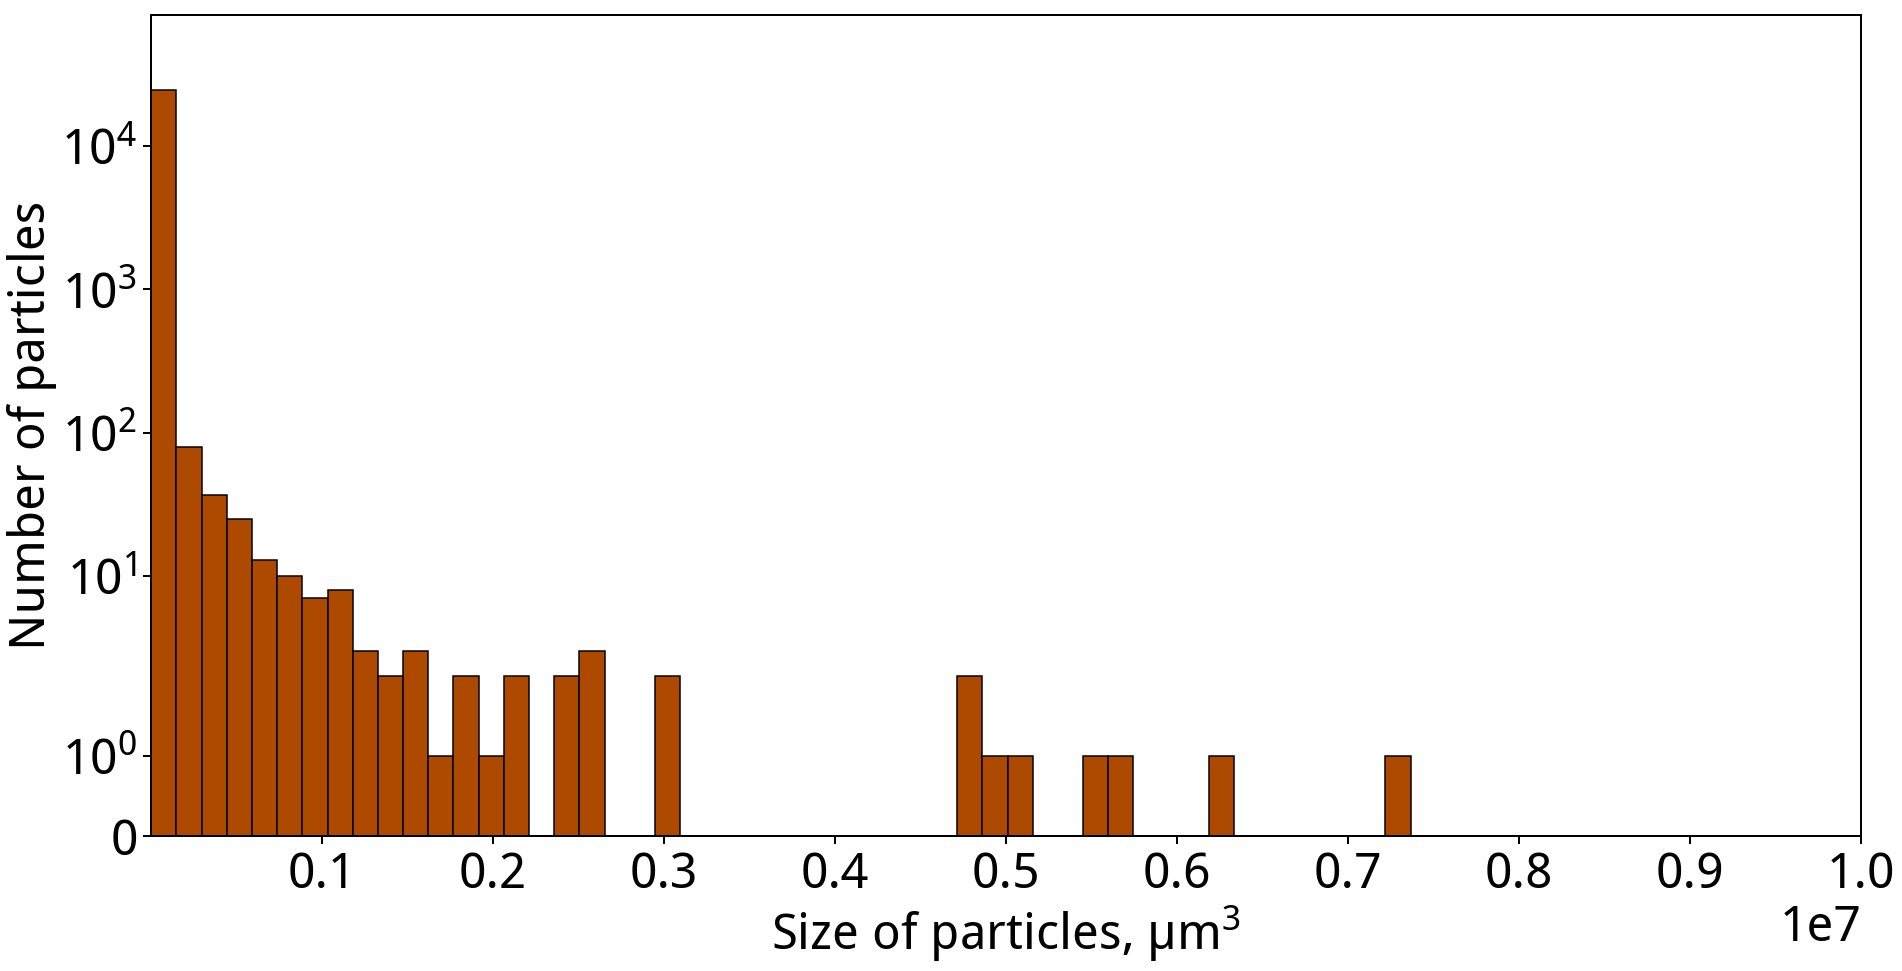

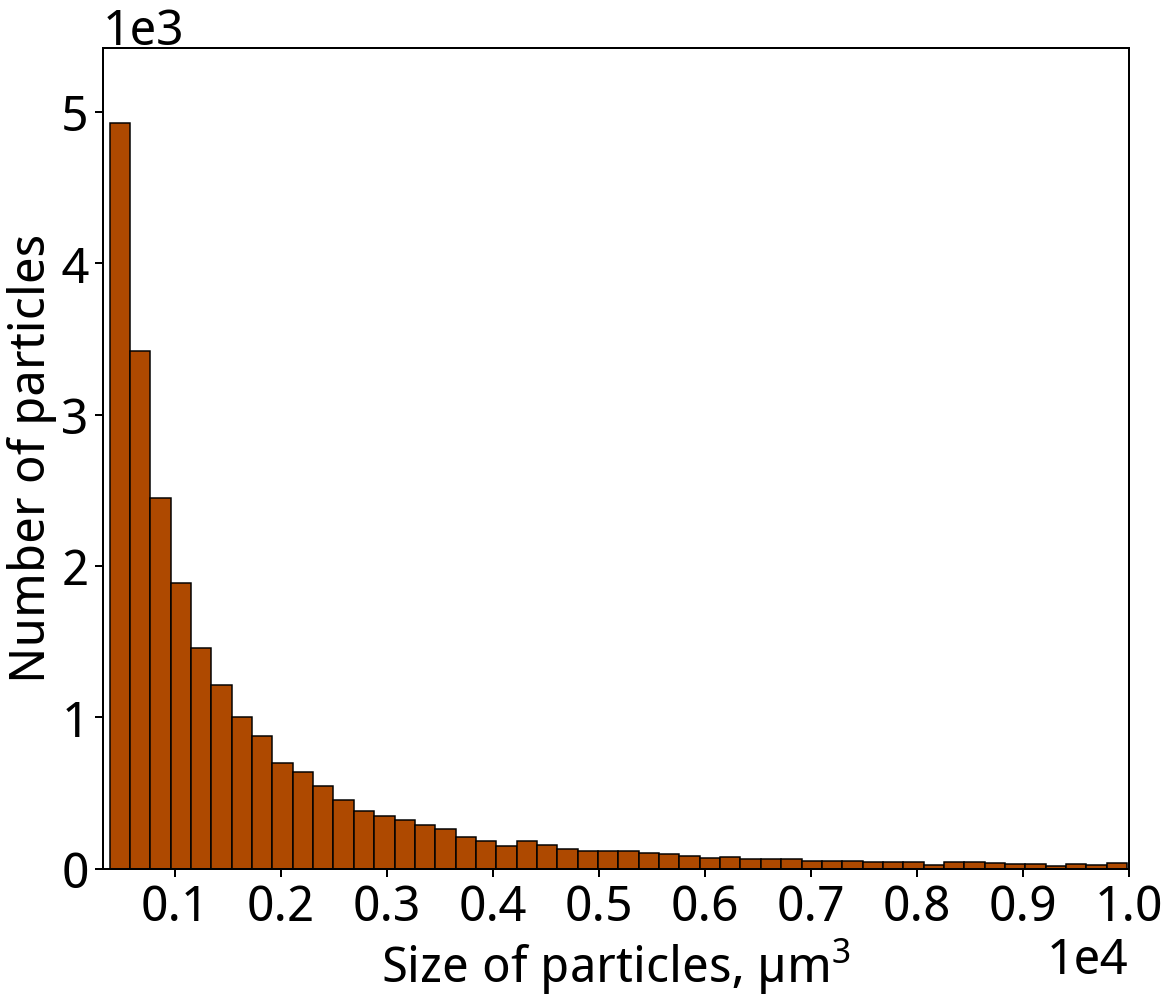

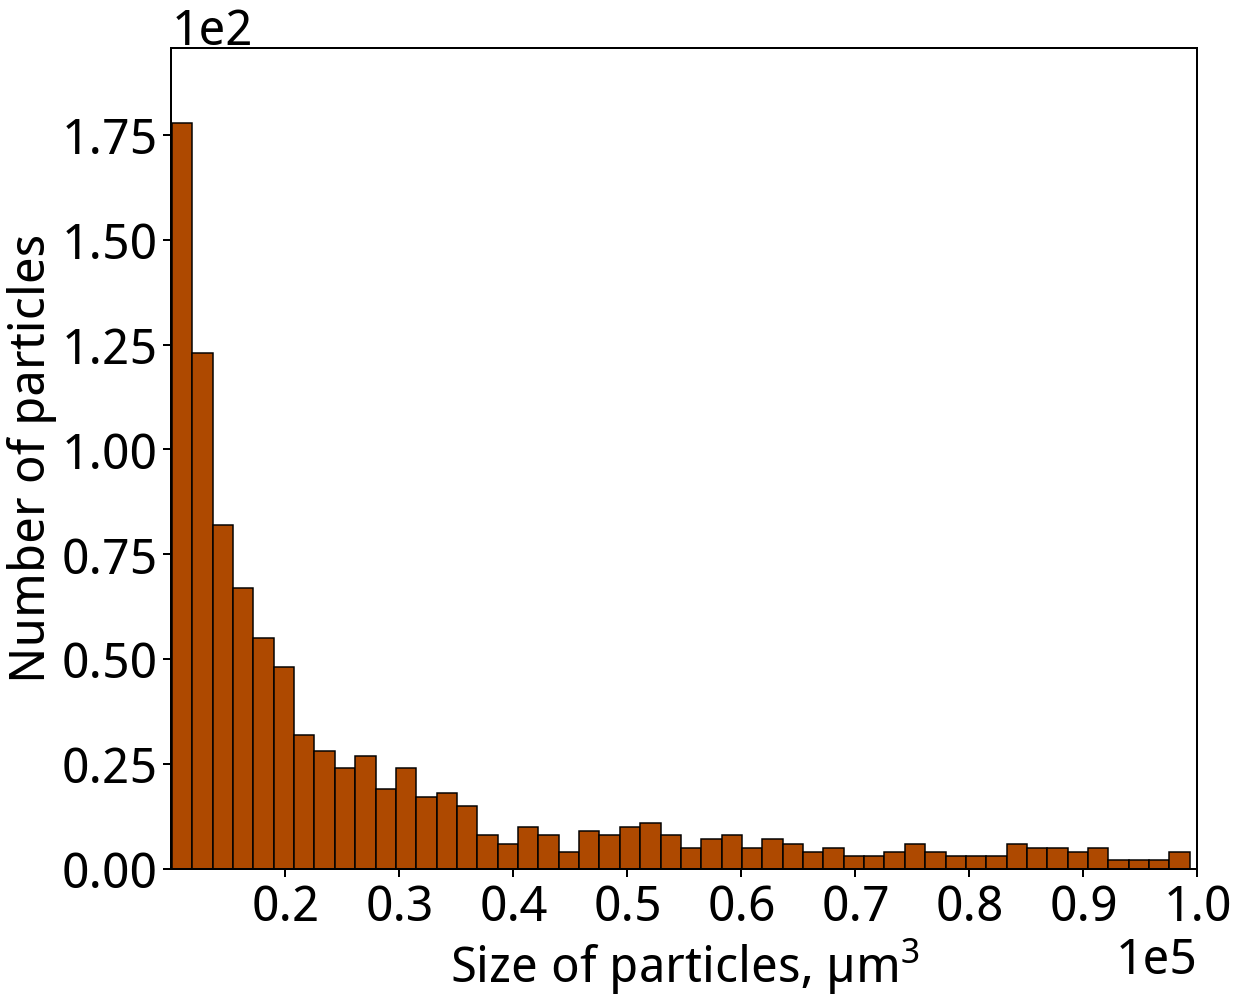

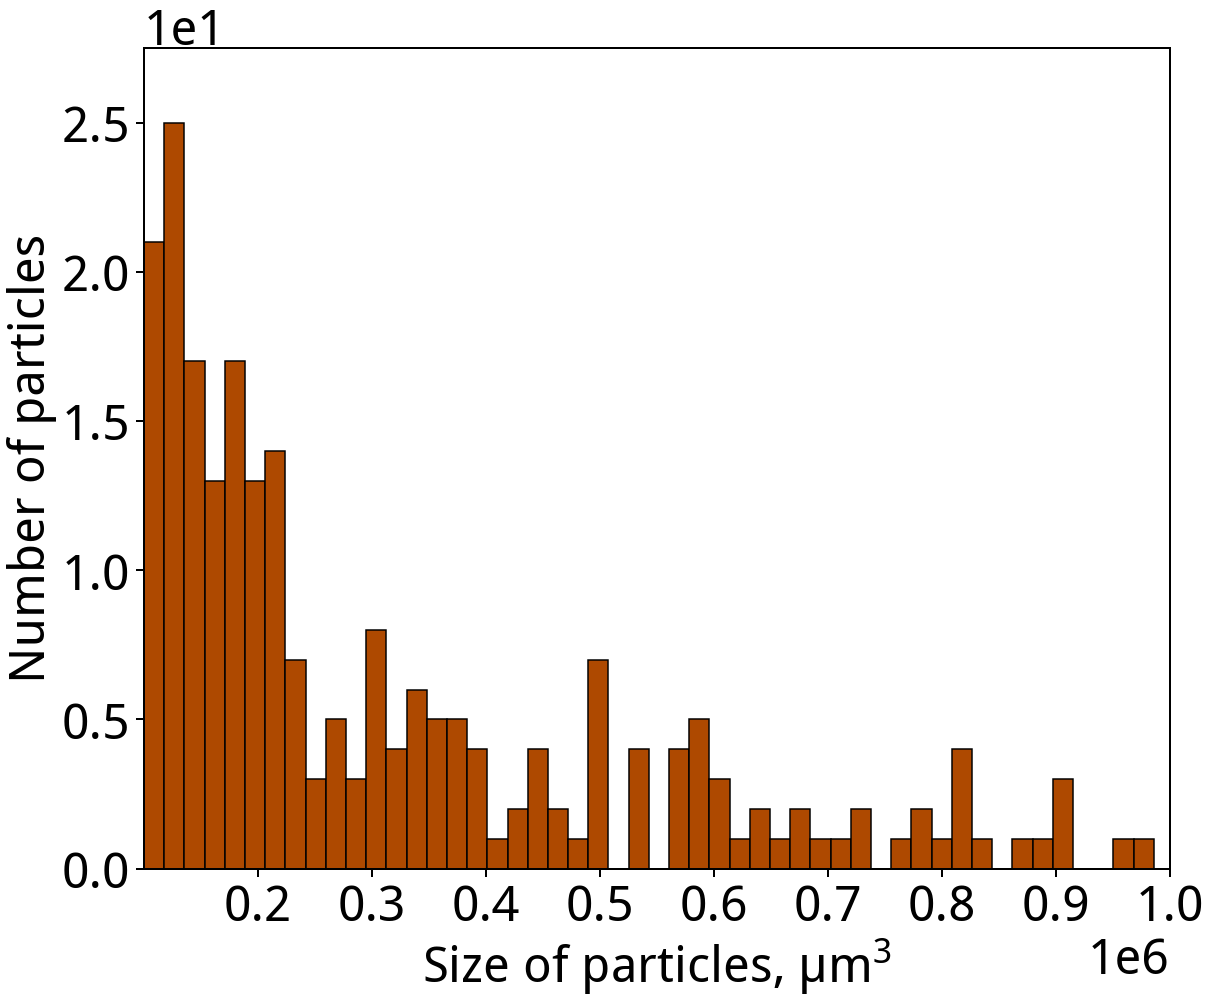

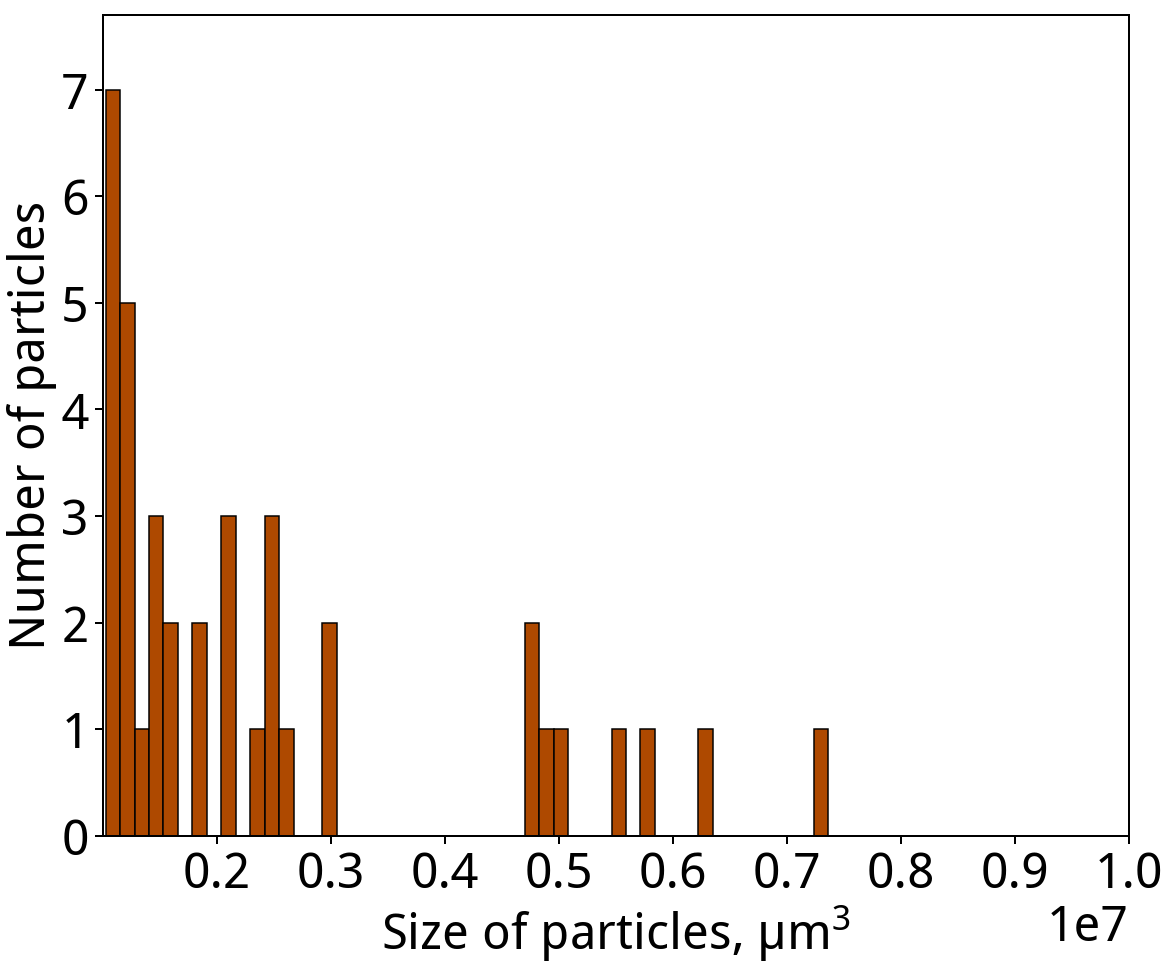

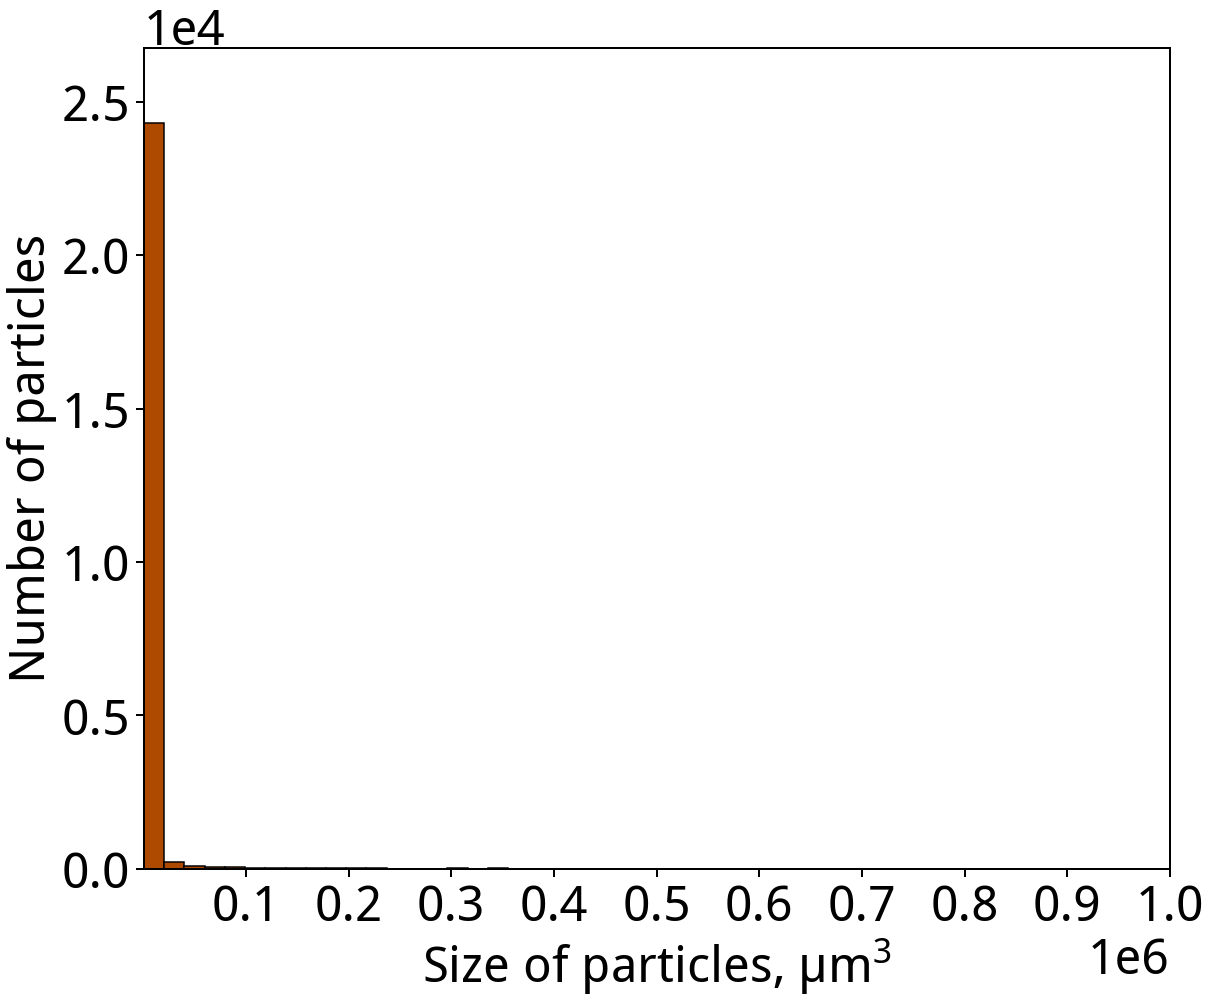

In [129]:
for sn, conf in sample_configs.iteritems():
    plot_barchart('./data/bioglass_raw_data/', 
                  './data/bioglass_results', 
                  conf,
                  sn,
                  stat_folder=conf['stat_folder'],
                  ps3=4**3)

# Piecharts

In [134]:
sample_configs_pie = {'A2':  {'color': '#663399', 
                              'ranges': RNGS, 
                              'tomo_name': 'scan_0007', 
                              'stat_folder': 'Analysis_temp',
                              'filename': 'particles_stats_old_'},
                     'A2Sr': {'color': '#1e824c', 
                              'ranges': RNGS, 
                              'tomo_name': 'scan_0005',
                              'stat_folder': 'Analysis_temp',
                              'filename': 'particles_stats_'},
                     'A2Zn': {'color': '#23819c', 
                              'ranges': RNGS, 
                              'tomo_name': 'scan_0008',
                              'stat_folder': 'Analysis_temp',
                              'filename': 'particles_stats_'},
                     '45S5': {'color': '#ae4900', 
                              'ranges': RNGS, 
                              'tomo_name': 'scan_0010', 
                              'stat_folder': 'Analysis_temp',
                              'filename': 'particles_stats_watershed_'}}

A2Zn
Max: 201640374.154, Min: 50.653
320-10000: 92435
10000-100000: 52292
100000-1000000: 6429
1000000-10000000: 336
A2
Max: 7547123766.74, Min: 50.653
320-10000: 58696
10000-100000: 29705
100000-1000000: 2823
1000000-10000000: 129
A2Sr
Max: 4802117497.17, Min: 50.653
320-10000: 41578
10000-100000: 24571
100000-1000000: 6070
1000000-10000000: 699
45S5
Max: 1320659358.73, Min: 50.653
320-10000: 65
10000-100000: 55
100000-1000000: 261
1000000-10000000: 177


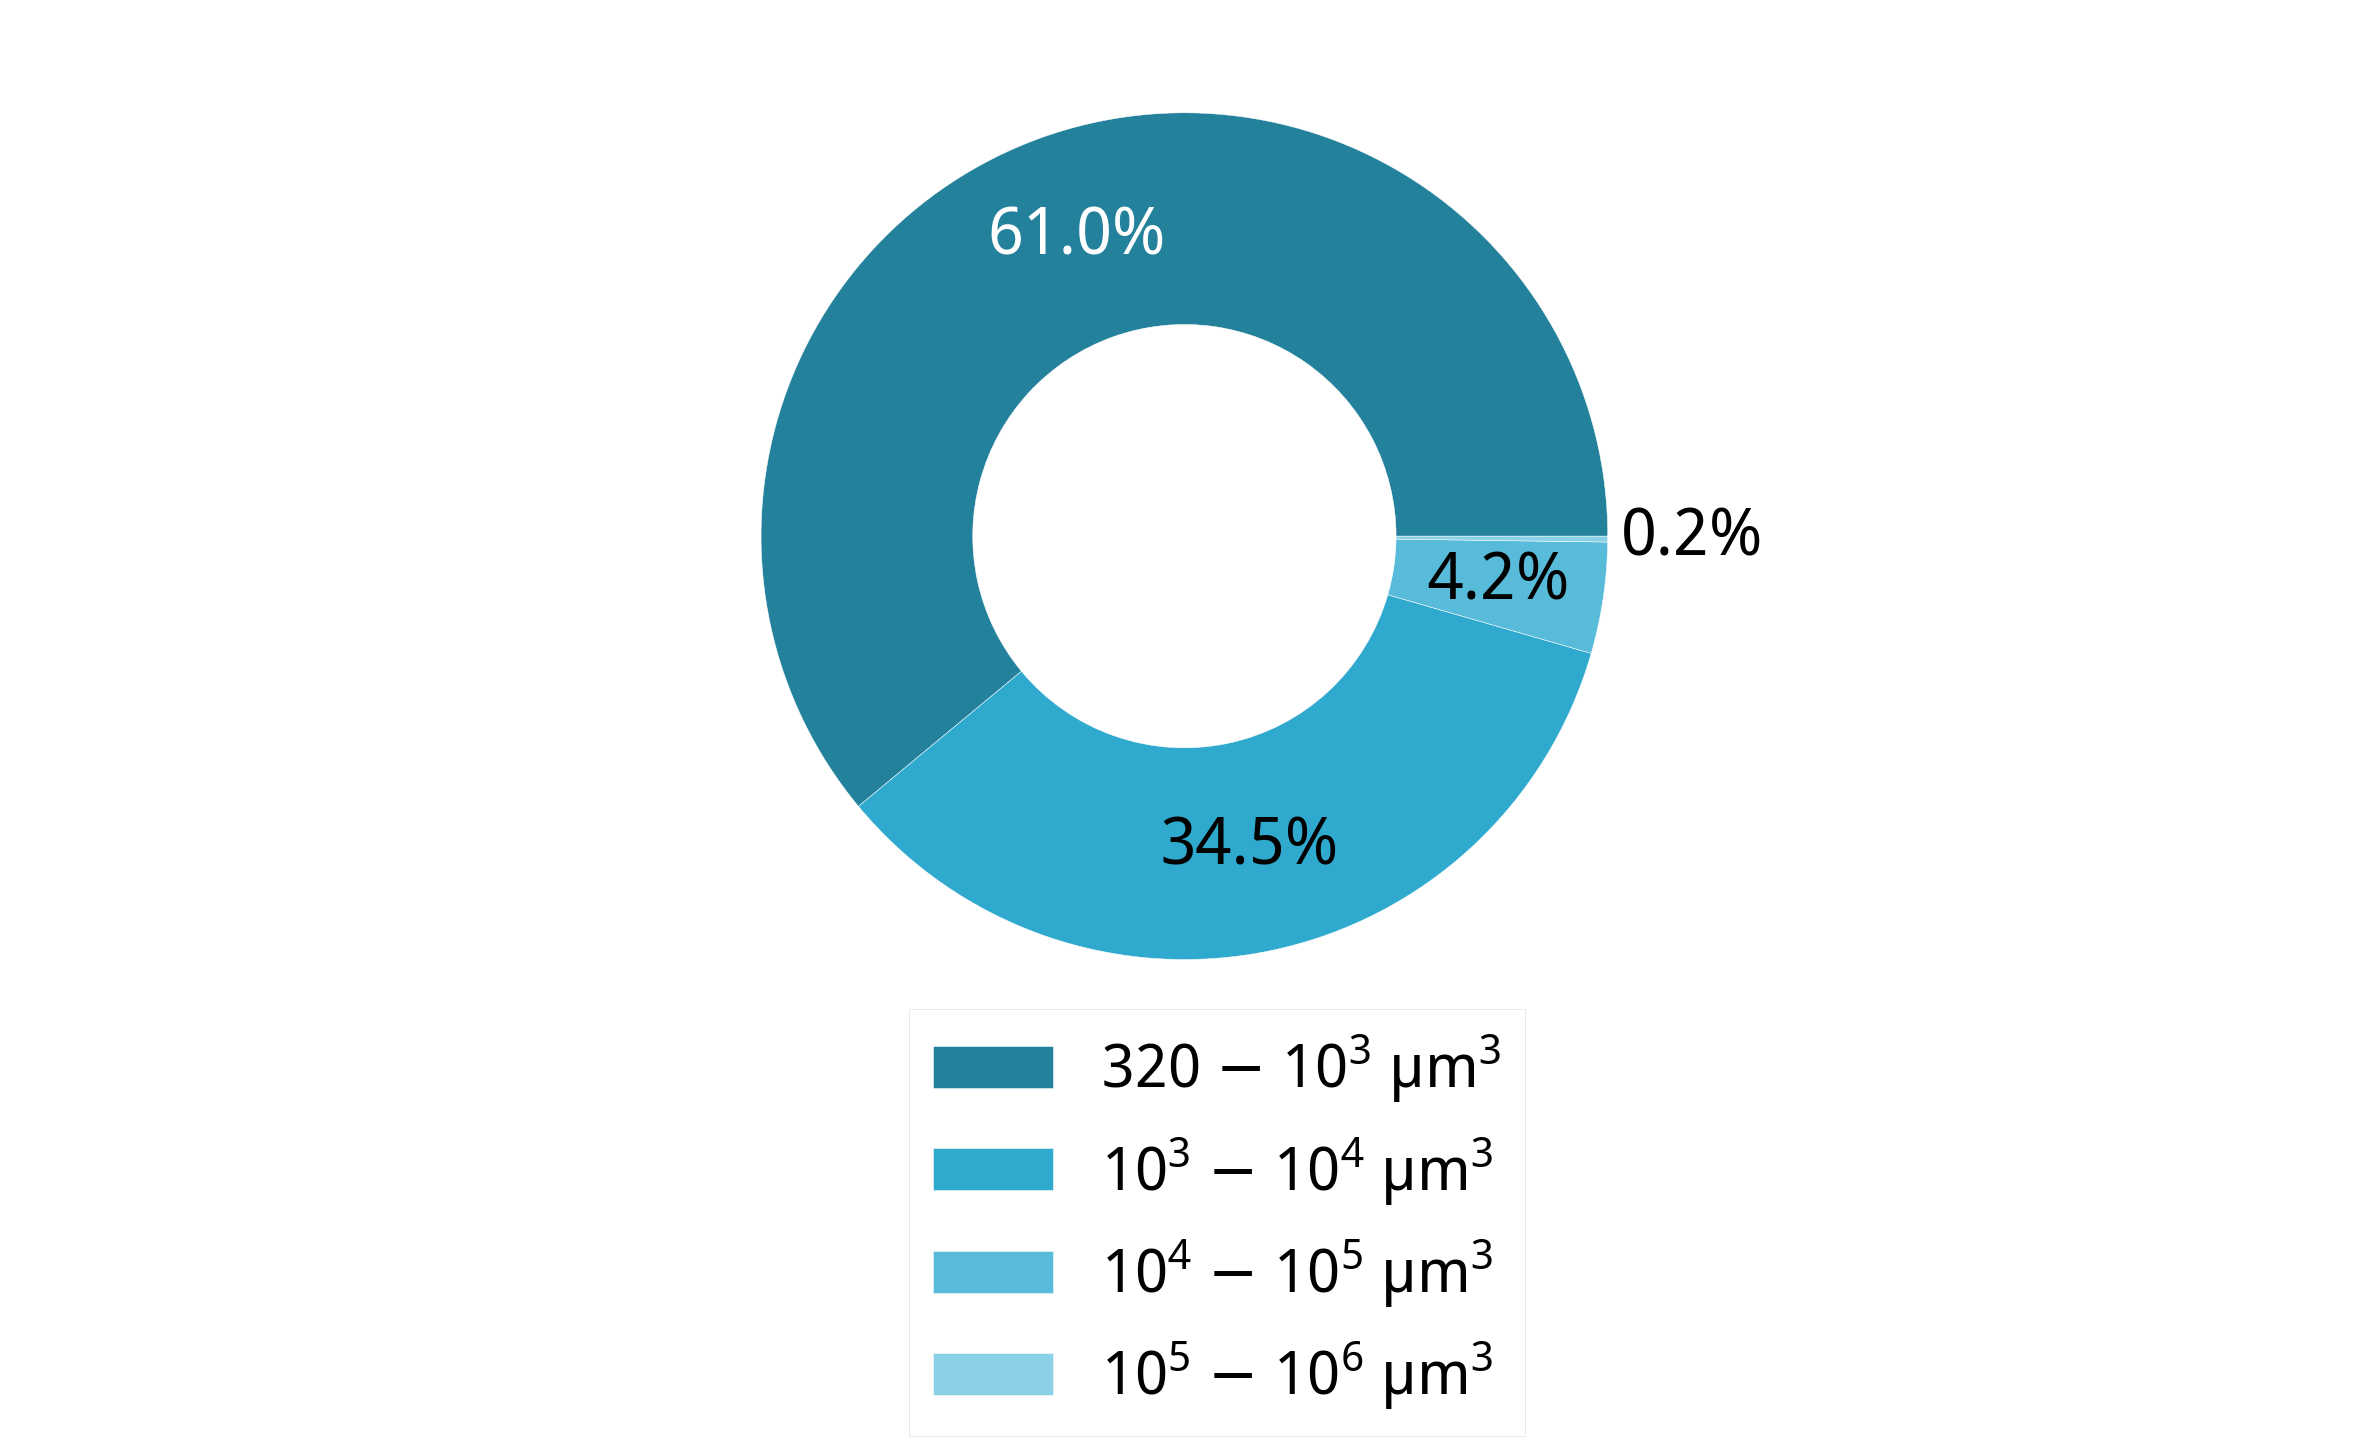

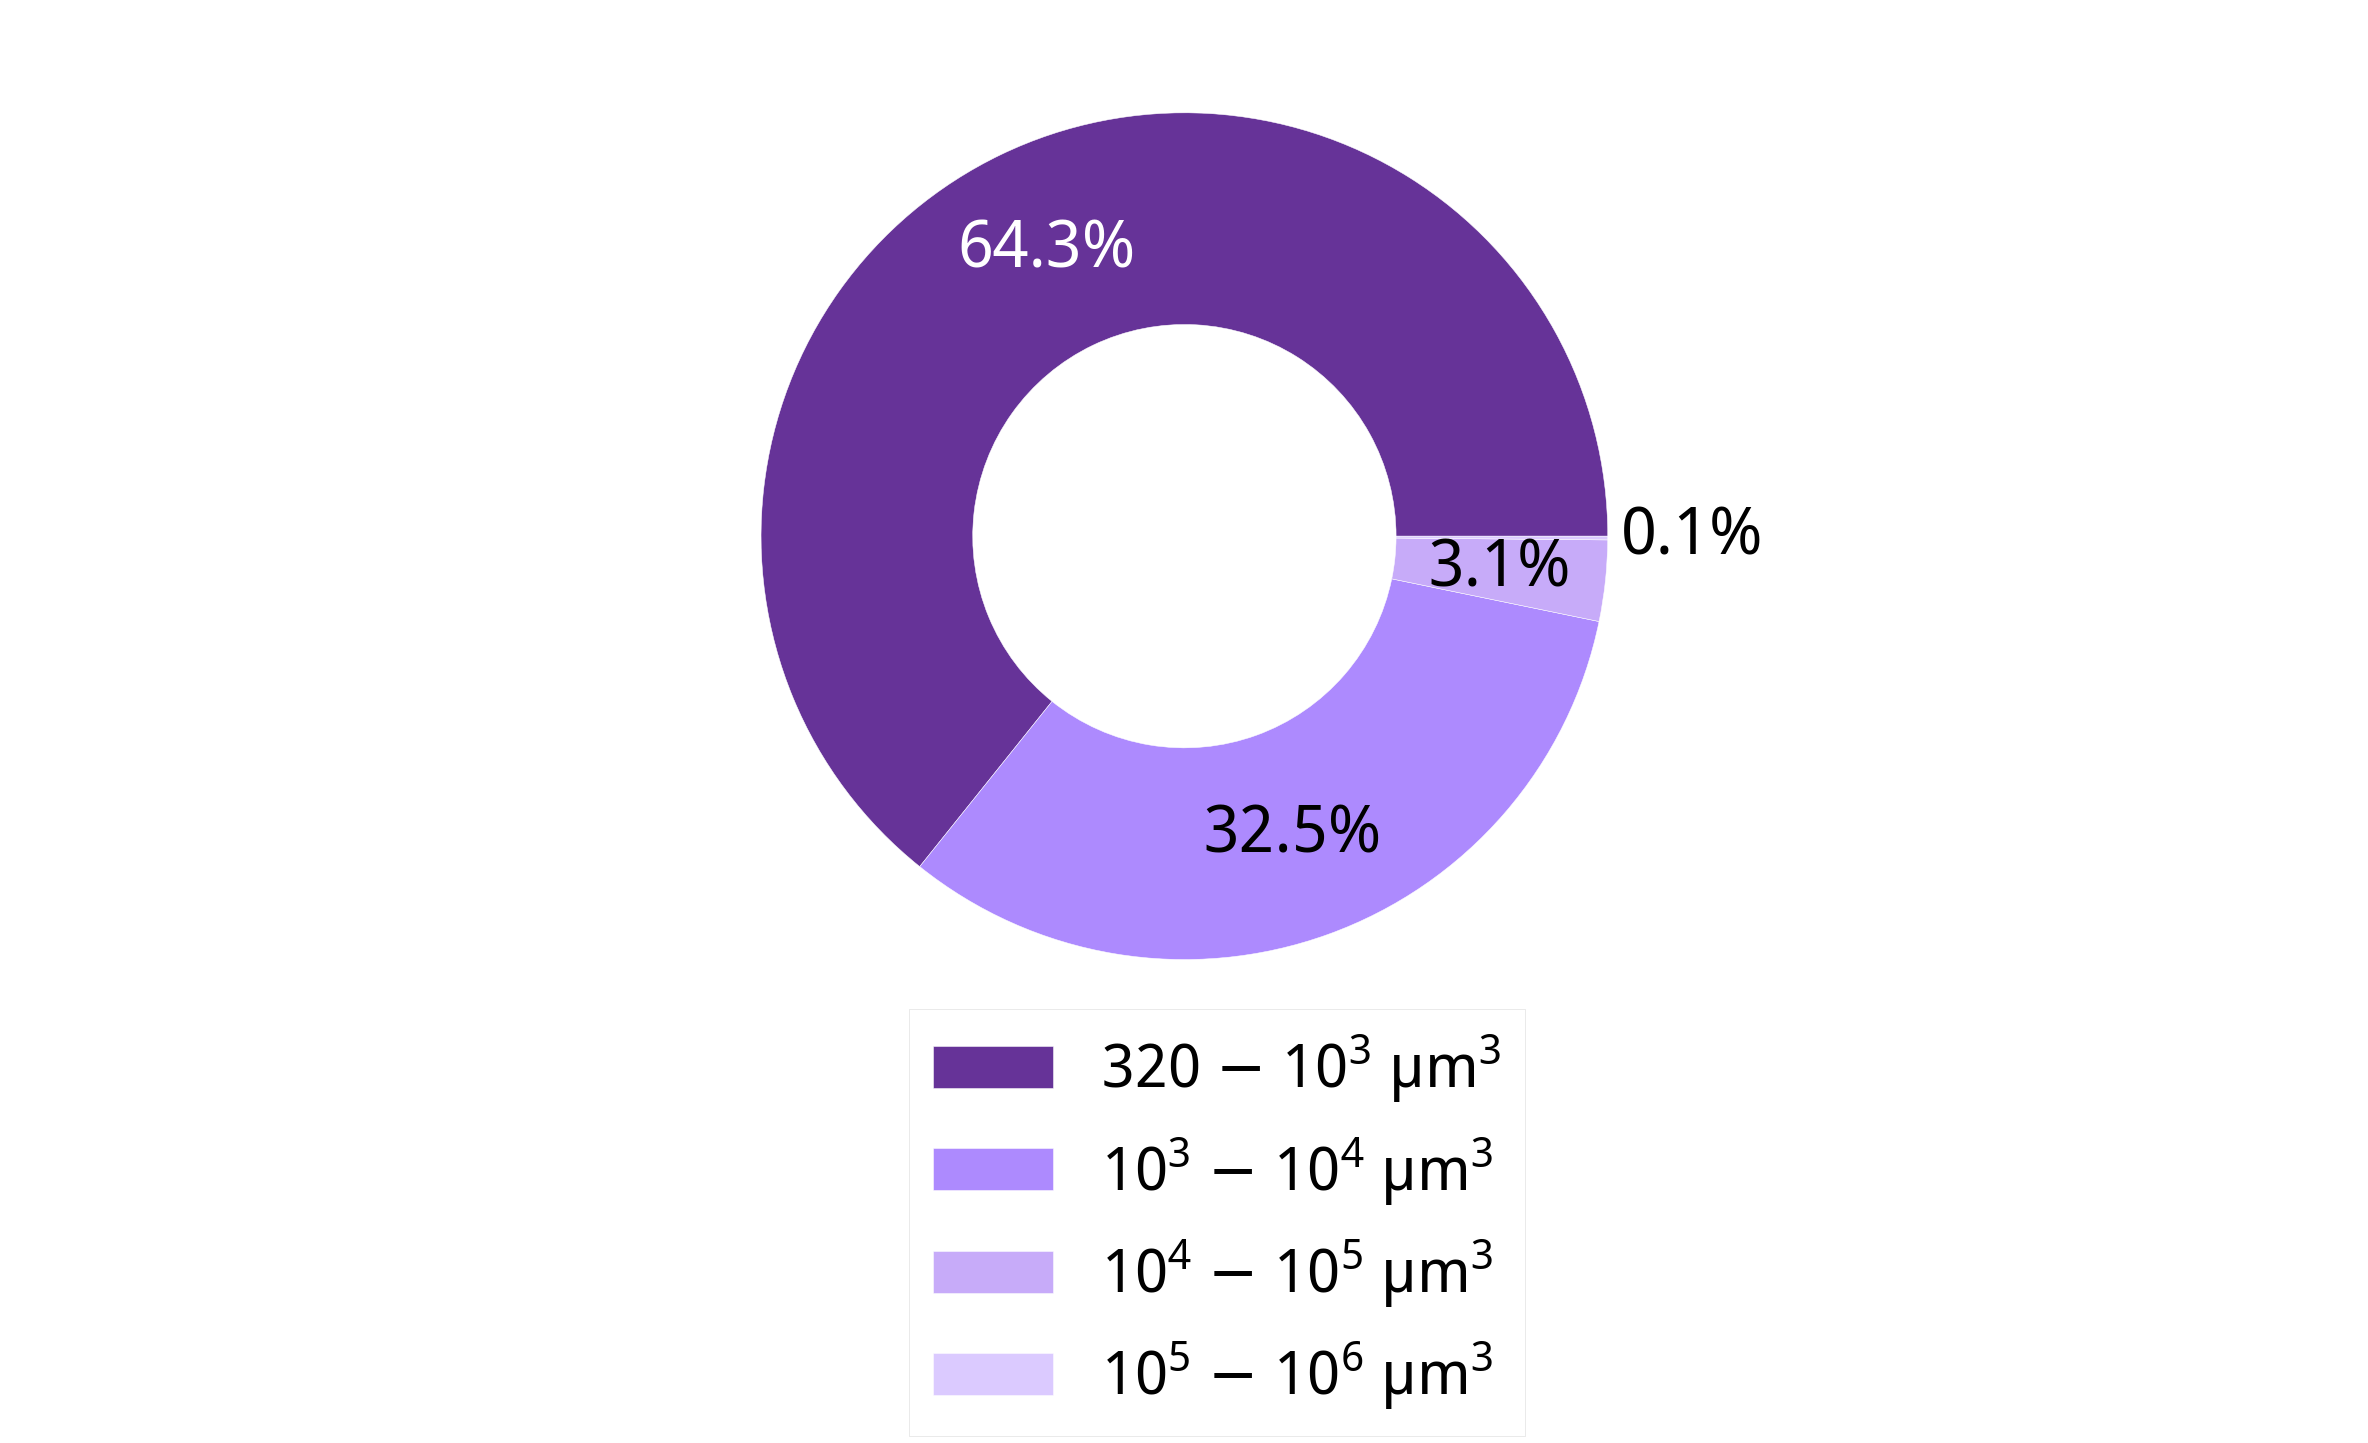

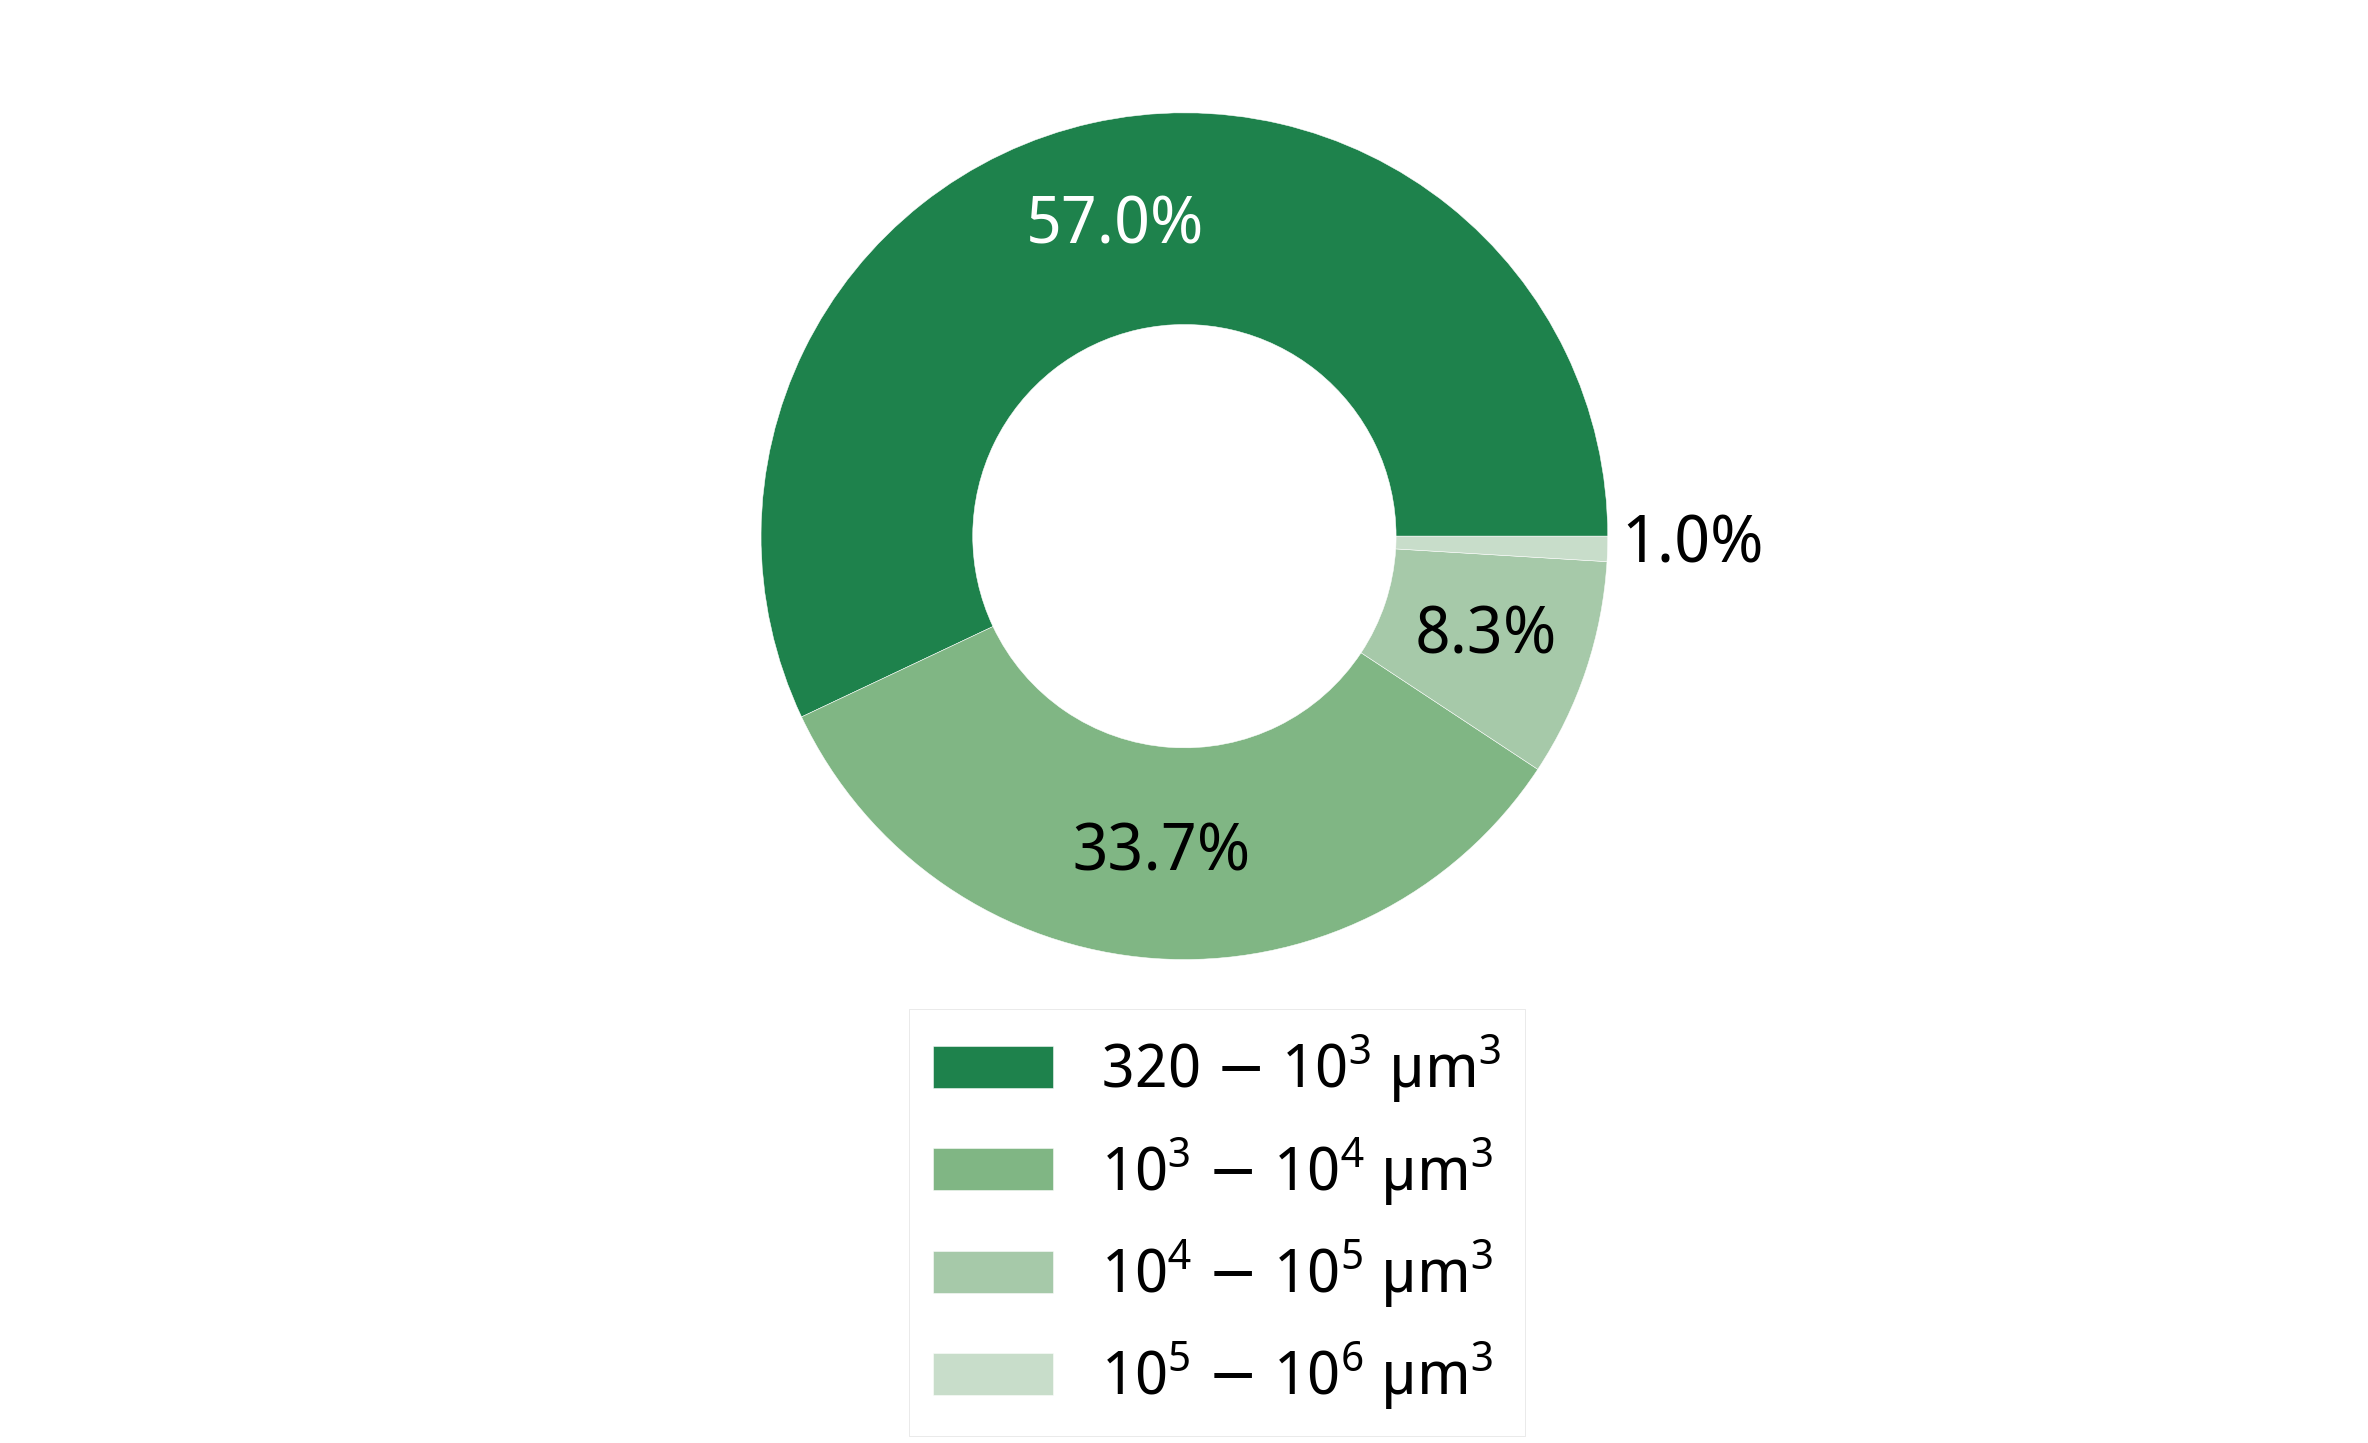

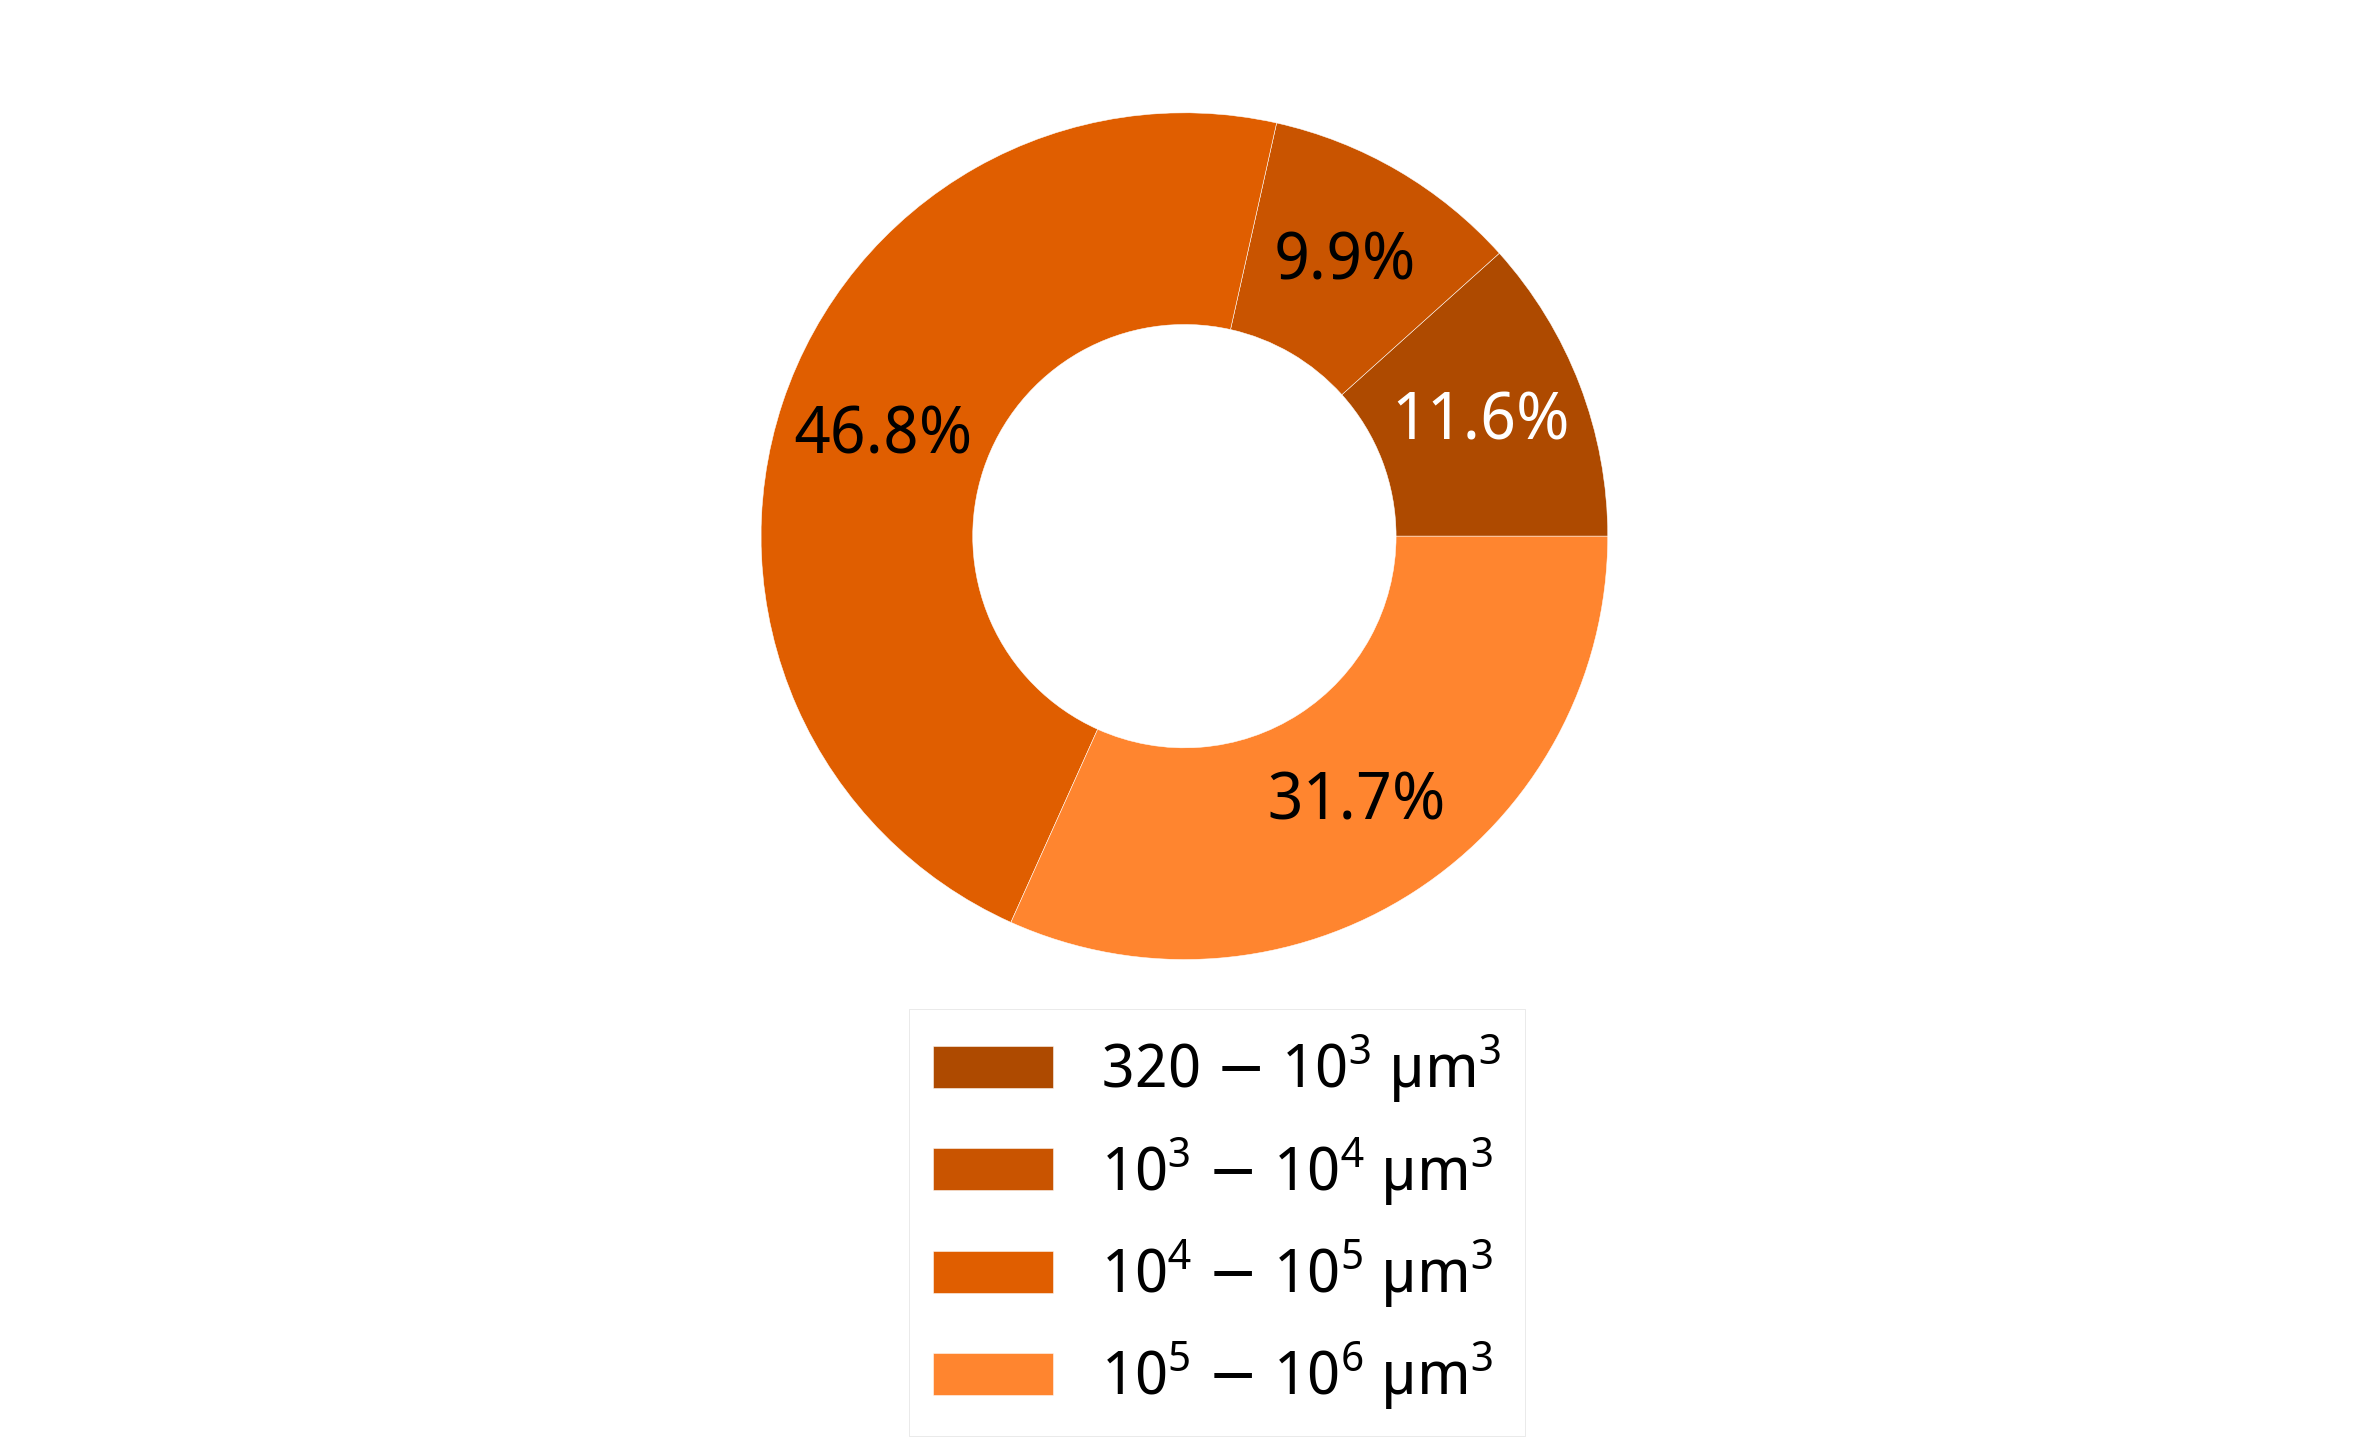

In [136]:
for sn, conf in sample_configs_pie.iteritems():
    create_pie_chart('./data/bioglass_raw_data/', 
                     './data/bioglass_results', 
                     conf,
                     sn,
                     [(320,10000), (10000,100000), (100000,1000000), (1000000,10000000)],
                     stat_folder=conf['stat_folder'],
                     title=sn,
                     lang='en',
                     zebra_color=(True,1), 
                     legend_fontsize=60,
                     chart_fontsize=65,
                     unit_scale=3.7**3)